## Lab-09: Spatial Data / Choropleth


Welcome to Lab 09!

In this and the following labs, you will learn some useful tools to handle geographical data in Python. In this lab, we will focus on the fundamentals of spatial data, specifically vector shapes, and how we can use them to create choropleths.

This Lab uses material from:
1. https://pygis.io/docs/a_intro.html
2. https://www.kaggle.com/code/alexisbcook/your-first-map
3. https://geopandas.org/en/stable/getting_started/introduction.html
4. https://autogis-site.readthedocs.io/en/2019/notebooks/L1/geometric-objects.html
5. https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
6. https://gistbok.ucgis.org/bok-topics/2021-quarter-02/map-projections

## GeoPandas

In this lab, we will use 'GeoPandas' python package.  As the name suggests, this package extends 'pandas' by adding support for geospatial data. The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame`, that can store geometry columns and perform spatial operations.

Here is an example of *geopandas.GeoDataFrame*

![image-2.png](https://geopandas.org/en/stable/_images/dataframe.svg)

We will introduce more details about this package throughout the lab. But first, we need to install (Colab has already installed this package for us) and import GeoPandas into the Python environment.

In [1]:
!pip install mapclassify #helper package
import geopandas as gpd # import geopandas

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

## Vector Shape

Vector features can be decomposed into three different geometric primitives: **points**, **LineString** and **polygons**.

![image.png](https://storage.googleapis.com/kaggle-media/learn/images/N1llefr.png)

### Point

A point is composed of one coordinate pair representing a specific location in a coordinate system. Points are the most basic geometric primitives having no length or area. By definition a point can’t be “seen” since it has no area; but this is not practical if such primitives are to be mapped. So points on a map are represented using symbols that have both area and shape (e.g. circle, square, plus signs).

In [88]:
# given the x and y coordinates, output the 'geometry' column
geometry = gpd.points_from_xy(x=[1], y=[1])
# initialize the GeoDataFrame
gdf_from_xy = gpd.GeoDataFrame(geometry=geometry)
gdf_from_xy

,geometry
0,POINT (1.00000 1.00000)


You can see that the data structure of a point in GeoPandas is `Point(x_coordinate, y_coordinate)`. the 'shapely' package allow us to directly define the `Point`.

In [90]:
from shapely.geometry import Point
gdf_from_shapely = gpd.GeoDataFrame(geometry=[Point(1, 0), Point(0, 1)])
gdf_from_shapely

,geometry
0,POINT (1.00000 0.00000)
1,POINT (0.00000 1.00000)


'geometry' can be thought as a special type of pandas column, we can retrieved value from 'geometry' same as any other pandas columns we saw in previous labs

In [ ]:
print(f'The X coordinate for first point is {gdf_from_shapely.geometry.x[0]}')
print('The Y coordinate for points are', gdf_from_shapely['geometry'].y.tolist())

The X coordinate for first point is 1.0
The Y coordinate for points are [0.0, 1.0]


We can also visualize points using `.plot()` function

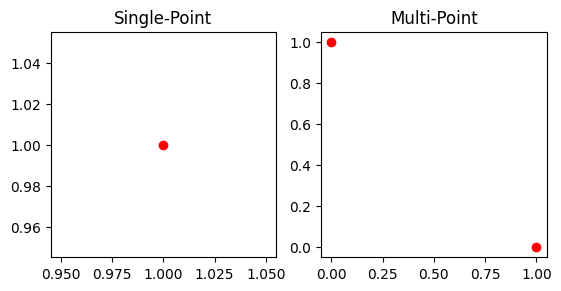

In [ ]:
plt.subplot(121)
gdf_from_xy.plot(ax=plt.gca(), color='r')
plt.title('Single-Point')
plt.subplot(122)
gdf_from_shapely.plot(ax=plt.gca(), color='r')
plt.title('Multi-Point')
plt.show()

Just like a regular `pandas.DataFrame`, a `geopandas.GeoDataFrame` can also store samples and features in columns and rows.

In [91]:
data = {'name': ['Spadina-Bloor', 'Spadina-College','Bay-Bloor','Queen Park'], # column 1
          'geometry': [Point(40,79), Point(40, 70), Point(55,79),Point(50,70)]} # shape
# create a GeoDataFrame from the data
gdf_city = gpd.GeoDataFrame(data)
gdf_city

,name,geometry
0,Spadina-Bloor,POINT (40.00000 79.00000)
1,Spadina-College,POINT (40.00000 70.00000)
2,Bay-Bloor,POINT (55.00000 79.00000)
3,Queen Park,POINT (50.00000 70.00000)


And just like regular `pandas.Series`, each column in `geopandas.GeoDataFrame` is a `geopands.GeoSeries`

In [ ]:
gdf_city['geometry'] #GeoSeries

0    POINT (40.00000 79.00000)
1    POINT (40.00000 70.00000)
2    POINT (55.00000 79.00000)
3    POINT (50.00000 70.00000)
Name: geometry, dtype: geometry

We can visualized this dataset using the `.plot()` function to see the spatial distribution of three cities

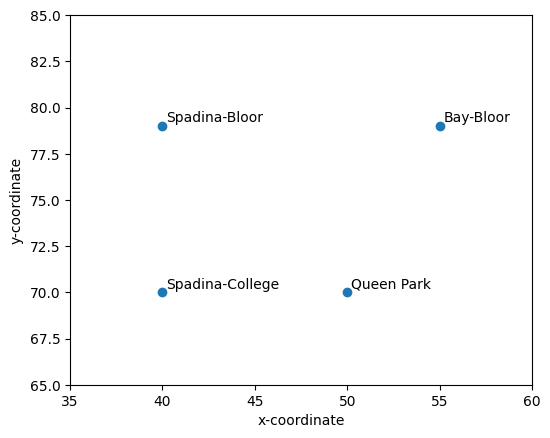

In [ ]:
# plot the GeoDataFrame geometry
gdf_city.plot()
# add a label to each point
for x, y, label in zip(gdf_city.geometry.x, gdf_city.geometry.y, gdf_city.name):
    plt.gca().annotate(label, xy=(x, y), xytext=(3, 3),
    textcoords="offset points")
plt.ylim(65, 85)
plt.xlim(35, 60)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

We seem capable of interpreting such symbols as points, but there may be instances when such interpretation may be ambiguous (e.g. does a point represents the entire city, or specific location inside the city)

### LineString

We can create a `LineString` by composing a sequence of *vertices*. A *vertex*, similar to points, is defined by x-y coordinate pairs. However, what differentiates a vertex from a point is its explicitly defined relationship with neighboring vertices. A vertex is connected to at least one other vertex. `LineString` can also be created using the Shapely package.

<Figure size 1500x500 with 0 Axes>

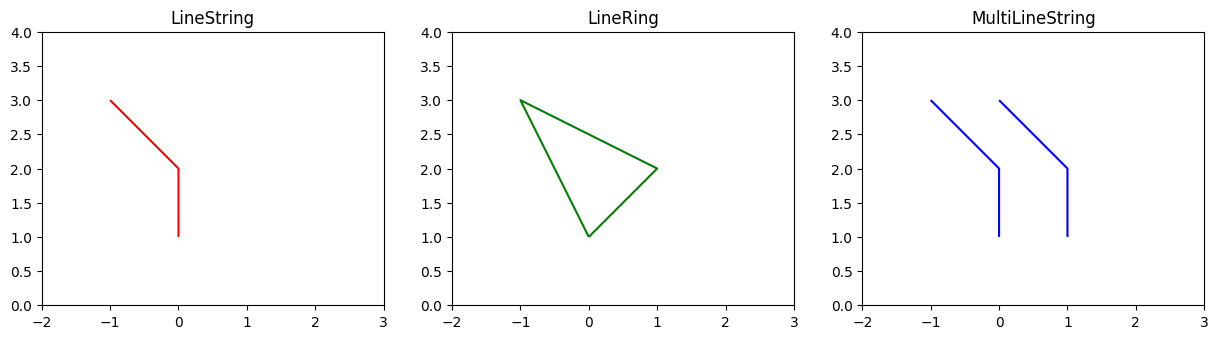

In [92]:
from shapely.geometry import LineString,MultiLineString

# create a line using three points
line = LineString([Point(0, 1), # start point
                     Point(0,2), # intermediate point (can be more than one points)
                     Point(-1,3)]) # end point

line_ring = LineString([Point(0, 1), Point(1,2), Point(-1,3), Point(0, 1)]) # line in a cricle

# multi lines in one data structure (can use tuple instead of Point)
multi_line = MultiLineString([[(0, 1), (0,2), (-1,3)], # first line
                              [(1, 1), (1,2), (0,3)]]) # second line
# visual
plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
gpd.GeoSeries([line]).plot(ax=ax[0], color='r')
ax[0].set_title('LineString')
gpd.GeoSeries([line_ring]).plot(ax=ax[1], color='g')
ax[1].set_title('LineRing')
gpd.GeoSeries([multi_line]).plot(ax=ax[2], color='b')
ax[2].set_title('MultiLineString')

plt.setp(ax, xlim=(-2, 3), ylim=(0, 4))
plt.show()


Some usefull attribute for `LineString`

In [ ]:
print('Length: ', line.length)
# minimum bounding region (minx, miny, maxx, maxy)
print('Bound: ', line.bounds)
# extracting the coordinates of points in the line
print('Coordinate of points within the line: ',
      [(x,y) for x,y in zip(line.coords.xy[0],line.coords.xy[1])] )


print('Is a \'LineRing\' intersecting with the \'LineString\': ', line.intersects(line_ring))
print('Is the Point(0,0) within the \'LineString\': ', line.contains(Point(0, 0)))
# plot the line

Length:  2.414213562373095
Bound:  (-1.0, 1.0, 0.0, 3.0)
Coordinate of points within the line:  [(0.0, 1.0), (0.0, 2.0), (-1.0, 3.0)]
Is a 'LineRing' intersecting with the 'LineString':  True
Is the Point(0,0) within the 'LineString':  False


Similiar as points, we can include `LineString` as the 'geometry' attribute of a `geopandas.GeoDataFrame`.

In [93]:
# LineString is a list of points
line1 = LineString([Point(40, 85), Point(40,70), Point(40,65)])

# There is not limit to the number of points in a line
line2 = LineString([Point(35,79),Point(60,79)])

# Or no need to create points, just use tuples of coordinates
line3 = LineString([(35,70),(60,70)])

# Convert a list of points into a line
points_to_line = [Point(53,65), Point(50, 70), Point(46,73), Point(45,79), Point(40,79), Point(35,85)]
line4 = LineString(points_to_line)

# Include both lines and points in a single GeoDataFrame.
point = [Point(40,79), Point(40, 70), Point(55,79), Point(50,70)] # four locations we had before
point_name = ['Spadina-Bloor', 'Spadina-College','Bay-Bloor','Queens Park']

# Create a GeoDataFrame
gdf_line = gpd.GeoDataFrame({'name': ['Spadina', 'Bloor', 'TTC 506',
                                      'Yonge Line'] + point_name, # combine two lists of shapes name
                            'properties': ['Street', 'Street', 'Transit', 'Transit',
                                     'Location', 'Location', 'Location', 'Location'], # type of the shape
                            'geometry':[line1, line2, line3, line4] + point }) # combine two lists of shapes
gdf_line

,name,properties,geometry
0,Spadina,Street,"LINESTRING (40.00000 85.00000, 40.00000 70.000..."
1,Bloor,Street,"LINESTRING (35.00000 79.00000, 60.00000 79.00000)"
2,TTC 506,Transit,"LINESTRING (35.00000 70.00000, 60.00000 70.00000)"
3,Yonge Line,Transit,"LINESTRING (53.00000 65.00000, 50.00000 70.000..."
4,Spadina-Bloor,Location,POINT (40.00000 79.00000)
5,Spadina-College,Location,POINT (40.00000 70.00000)
6,Bay-Bloor,Location,POINT (55.00000 79.00000)
7,Queens Park,Location,POINT (50.00000 70.00000)


When mixing different types of geometry, we can check their types using `.type` attribute

In [ ]:
#checking the type of the geometry in the GeoDataFrame
gdf_line.type # or gdf_line.geom_type

0    LineString
1    LineString
2    LineString
3    LineString
4         Point
5         Point
6         Point
7         Point
dtype: object

It is worth noting that different Shapely data structures may have different attributes. For example, the `LineString` does not have an x or y attribute.

In [ ]:
# Remove # below and try the following code to see what the output is
# gdf_line.geometry[0].x

Let us using `gdf_lines` to plot a your first map

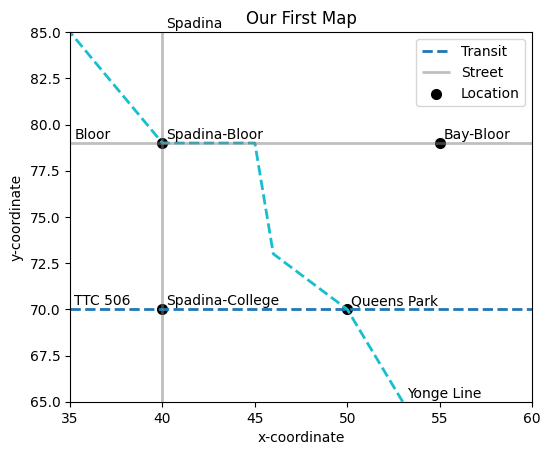

In [94]:
def plot_from_gdf(gdf) -> None:
    for prop, color, linestyle, alpha in [('Transit', 'tab10', '--', 1), ('Street', 'grey', '-', 0.5),
                                          ('Location', 'black', '-', 1)]: # set the color, linestyle, and alpha
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca()) # for the case of cmap is given

    switch = {
        Point: lambda s: (s.x, s.y), # if point, annotate at the point
        LineString: lambda s: (s.xy[0][0], s.xy[1][0]) # if line, annotate at the first point
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, 3), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2]) # very useful to set the limits
    plt.ylim(gdf.total_bounds[1], gdf.total_bounds[3])
    plt.legend(['Transit', 'Street', 'Location'])
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('Our First Map')
    plt.show()

plot_from_gdf(gdf_line)

Combining `Point` and `LineString` with other features into a single `GeoDataFrame` can be very useful in analysis

In [ ]:
# Given two locations, we can calculate the distance between them
def distance_between_two_locations(gdf, location1, location2) -> float:
    # Extract the geometry of the two locations
    geom1 = gdf[gdf['name'] == location1].geometry.values[0] #convert GeoSeries to shapely.geometry
    geom2 = gdf[gdf['name'] == location2].geometry.values[0]
    # Computes the Cartesian distance between two geometries.
    return geom1.distance(geom2)

# Given two lines, we can calculate the intersection between them
def intersection_between_two_lines(gdf, location1, location2) -> list:
    geom1 = gdf[gdf['name'] ==  location1].geometry.values[0]
    geom2 = gdf[gdf['name'] ==  location2].geometry.values[0]
    # Returns the geometry that is shared between input geometries
    intersecton = geom1.intersection(geom2)

    return [(x,y) for x,y in zip(intersecton.xy[0],intersecton.xy[1])]

In [ ]:
# distance between two points
distance_between_two_locations(gdf_line, 'Spadina-Bloor', 'Spadina-College')

9.0

In [ ]:
distance_between_two_locations(gdf_line,'Spadina-College', 'Yonge Line')

6.708203932499369

In [ ]:
distance_between_two_locations(gdf_line, 'Spadina-Bloor', 'Yonge Line')

0.0

In [ ]:
intersection_between_two_lines(gdf_line, 'TTC 506', 'Yonge Line')

[(50.0, 70.0)]

In [ ]:
intersection_between_two_lines(gdf_line,'TTC 506', 'Bloor')

[]

Like a point, a true line can’t be seen since it has no area. And like a point, a line is symbolized using shapes that have a color, width and style (e.g. solid, dashed, dotted, etc…). Roads and rivers are commonly stored as polylines in a GIS.

### Polygon

 A polygon is an area defined by three or more line segments, each with a starting and ending pair of coordinates that match. Since the ploygon is a closed shape, we can define the area of the polygon.

In [ ]:
from shapely.geometry import Polygon, MultiPolygon
# the points in polygon must be in the correct order
polygon = Polygon([Point(40,79), Point(40, 70),Point(50,70), Point(55,79)])

print('Area: ', polygon.area)
print('Bound: ', polygon.bounds)
print('Centroid: ', polygon.centroid)
print('Exterior: ', polygon.exterior)
print('Points that form the Polygon: ', [(x,y) for x,y in zip(polygon.exterior.xy[0],polygon.exterior.xy[1])])

print('Is a Polygon intersecting with the LineString: ', polygon.intersects(line1)) # check if the polygon intersects with the line
print('Is the Point(40, 75) within the Polygon: ', polygon.contains(Point(40, 75))) # check if the point is within the polygon

Area:  112.5
Bound:  (40.0, 70.0, 55.0, 79.0)
Centroid:  POINT (46.333333333333336 74.8)
Exterior:  LINEARRING (40 79, 40 70, 50 70, 55 79, 40 79)
Points that form the Polygon:  [(40.0, 79.0), (40.0, 70.0), (50.0, 70.0), (55.0, 79.0), (40.0, 79.0)]
Is a Polygon intersecting with the LineString:  True
Is the Point(40, 75) within the Polygon:  False


what if the points are not in the correct order?

In [ ]:
# Similar to the LineString, we can create a polygon using a list of tuples.
polygon_failed = Polygon([(40,79), (50,70), (55,79), (40, 70)])

print('Area: ', polygon_failed.area)
print('Bound: ', polygon_failed.bounds)

Area:  0.0
Bound:  (40.0, 70.0, 55.0, 79.0)


Although the bounds and points are the same in two polygons, the calculated areas are totally different.

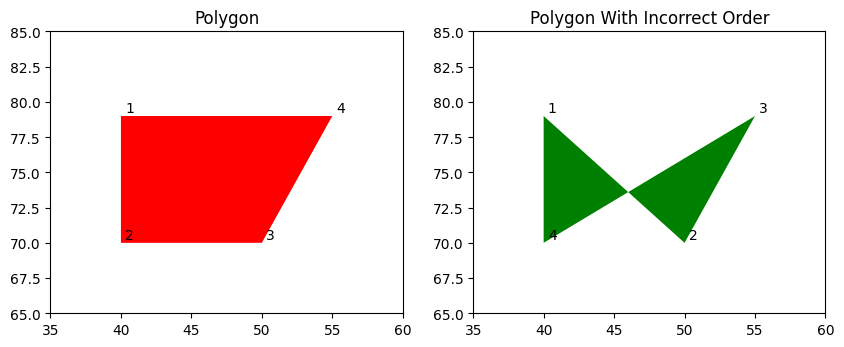

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot polygons and annotate vertices for the first subplot
for data, poly in [(ax[0], polygon), (ax[1], polygon_failed)]:
    gpd.GeoSeries([poly]).plot(ax=data, color='r' if data == ax[0] else 'g')
    data.set_title('Polygon' if data == ax[0] else 'Polygon With Incorrect Order')
    # Annotate vertices
    for x, y, label in zip(poly.exterior.coords.xy[0], poly.exterior.coords.xy[1], ['1', '2', '3', '4']):
        data.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

plt.setp(ax, xlim=(35, 60), ylim=(65, 85))
plt.show()

Indeed, polygons can vary greatly in complexity and can be defined with any number of points to suit specific requirements. It is even possible to create polygons with holes inside them, which are often referred to as "polygon with holes" or "polygon with interior rings". These polygons are commonly used in various fields such as geography, computer graphics, and urban planning to represent areas with complex boundaries.

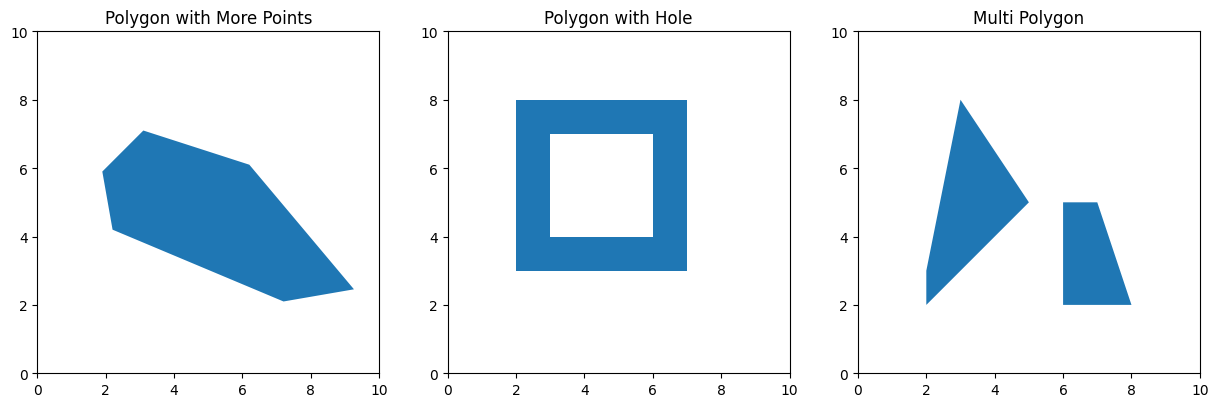

In [ ]:
# polygon with more points
polygon_complex = Polygon([(2.2, 4.2), (7.2, 2.1), (9.26, 2.456),(6.2, 6.1),(3.1, 7.1),(1.9, 5.9)])

# create a polygon with a hole
exterior = [(2, 8), (7, 8), (7, 3), (2, 3)]
interior = [(3, 7), (3, 4), (6, 4), (6, 7)]
polygon_with_hole = Polygon(shell=exterior, holes=[interior])

# multi polygons in one data structure
ploygon1 = Polygon([(2, 3), (3, 8), (5, 5), (2, 2)])
ploygon2 = Polygon([(7, 5), (6, 5), (6, 2), (8, 2)])
multi_polygon = MultiPolygon([ploygon1, ploygon2])

# visualize the polygon
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
gpd.GeoSeries([polygon_complex]).plot(ax=ax[0])
ax[0].set_title('Polygon with More Points')
gpd.GeoSeries([polygon_with_hole]).plot(ax=ax[1])
ax[1].set_title('Polygon with Hole')
gpd.GeoSeries([multi_polygon]).plot(ax=ax[2])
ax[2].set_title('Multi Polygon')
plt.setp(ax, xlim=(0, 10), ylim=(0, 10))

plt.show()

Same as `Point` and `LineString`, We can add a `Polygon` into the `GeoDataFrame`

In [ ]:
# Create a GeoDataFrame
gdf_polygon = gpd.GeoDataFrame({'name': 'UofT', 'properties': 'Area', 'geometry': polygon}, index=[0])

# add the new polygon to the existing GeoDataFrame
gdf_map = pd.concat([gdf_line, gdf_polygon], ignore_index=True)
gdf_map

,name,properties,geometry
0,Spadina,Street,"LINESTRING (40.00000 85.00000, 40.00000 70.000..."
1,Bloor,Street,"LINESTRING (35.00000 79.00000, 60.00000 79.00000)"
2,TTC 506,Transit,"LINESTRING (35.00000 70.00000, 60.00000 70.00000)"
3,Yonge Line,Transit,"LINESTRING (53.00000 65.00000, 50.00000 70.000..."
4,Spadina-Bloor,Location,POINT (40.00000 79.00000)
5,Spadina-College,Location,POINT (40.00000 70.00000)
6,Bay-Bloor,Location,POINT (55.00000 79.00000)
7,Queens Park,Location,POINT (50.00000 70.00000)
8,UofT,Area,"POLYGON ((40.00000 79.00000, 40.00000 70.00000..."


In [ ]:
# check the type of the geometry in the GeoDataFrame
gdf_map.type

0    LineString
1    LineString
2    LineString
3    LineString
4         Point
5         Point
6         Point
7         Point
8       Polygon
dtype: object

We also need to update the plot function to properly allow for polygons

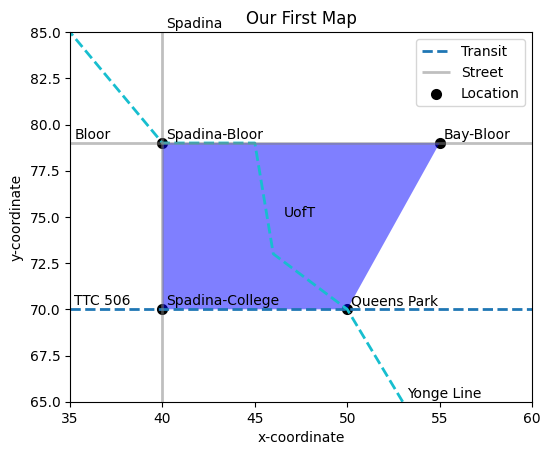

In [ ]:
def plot_from_gdf(gdf) -> None:
    for prop, color, linestyle, alpha in [('Transit', 'tab10', '--', 1), ('Street', 'grey', '-', 0.5),
                                          ('Location', 'black', '-', 1), ('Area', 'blue', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        LineString: lambda s: (s.xy[0][0], s.xy[1][0]),
        Polygon: lambda s: (s.centroid.x, s.centroid.y) # if the shape is a polygon, annotate at the centroid
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, 3), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(gdf.total_bounds[1], gdf.total_bounds[3])
    plt.legend(['Transit', 'Street', 'Location'])
    plt.show()

plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Our First Map')
plot_from_gdf(gdf_map)

## Geo-Fencing


![image](https://thumbvista.com/wp-content/uploads/2022/04/Screen-Shot-2022-04-11-at-10.54.23-AM-1024x409.png)

Geofencing involves creating a virtual geographical boundary on a map to detect when users (points) enter or leave this boundary. Its applications are varied and include:

- Triggering marketing actions or advertisements for specific geographic locations.
- Enhancing augmented reality experiences, such as providing information about activities in a park as users walk through it.
- Tracking traffic flow between different regions of a city or geographical area, such as monitoring the number of people commuting from Scarborough to downtown Toronto.
- Ecological tracking of GPS-tagged animals, like monitoring the movements of whales entering a bay and studying their seasonal patterns.

Geofencing allows for tracking whether a point, such as a user's device location, is within a specific region or not. Additionally, given a region, it enables the generation of a list of users within that region. To implement geofencing, the Polygon object can be used to create the geofence boundary on a map. In this context, for example, the polygon representing the University of Toronto could serve as the geofencing boundary. More information about geofencing can be found [here](https://en.wikipedia.org/wiki/Geo-fence).

In [ ]:
# Given a location (name or coordinate) and area (geo-fence), we can check whether the location is within the area
def location_within_area(gdf, location, area) -> bool:
     #if given Point, use it, otherwise, get the geometry of the location
    geom_location = location if isinstance(location, Point) else gdf[gdf['name'] == location].geometry.values[0]
    geom_area = gdf[gdf['name'] == area].geometry.values[0]
    return geom_area.contains(geom_location)

print('Is the Spadina-Bloor within the UofT: ', location_within_area(gdf_map, 'Spadina-Bloor', 'UofT'))
print('Is the Point(45, 75) within the UofT: ', location_within_area(gdf_map, Point(45, 75), 'UofT')) #You can directly use the Point object

# or iterate through a list of locations
user_location = [Point(50, 77), Point(31, 20), Point(47, 77), Point(50, 70)]
for location in user_location:
    print(f'Is the location {location} within the UofT: ', location_within_area(gdf_map, location, 'UofT'))

Is the Spadina-Bloor within the UofT:  False
Is the Point(45, 75) within the UofT:  True
Is the location POINT (50 77) within the UofT:  True
Is the location POINT (31 20) within the UofT:  False
Is the location POINT (47 77) within the UofT:  True
Is the location POINT (50 70) within the UofT:  False


In [ ]:
# Print all the locations within the area (geo-fence)
def get_all_location_within_area(gdf, area) -> None:

    # get the geometry of the area
    if isinstance(area, Polygon):
        geom_area = area
    else:
        geom_area = gdf[gdf['name'] == area].geometry.values[0]

    # iterate through the GeoDataFrame to find all the locations within the area
    for _, row in gdf.iterrows():
        if geom_area.contains(row.geometry) and isinstance(row.geometry, Point):
            print(row['name'], ' is within ', area)

# add a new location to the existing GeoDataFrame
new_location = gpd.GeoDataFrame({'name': 'Robarts Library', 'properties':
                                 'Location', 'geometry': Point(43, 75)}, index=[0])
gdf_map = pd.concat([gdf_map, new_location], ignore_index=True)

get_all_location_within_area(gdf_map, 'UofT')

Robarts Library  is within  UofT


## Data Storage Formats

In the previous section, we created a very simple map using `Point`, `LineString`, and `Polygon`. Real-world maps are actually also created using these geometric shapes, but much more complex than the one we saw in the previous sections. After geologists spend enormous amounts of time plotting the shapes to describe a geological area, the next problem is: how can we store these vector shapes? There are a variety of storage formats used for vectors, and we will introduce two of them, Shapefiles and GeoJSON (optional) in this lab.

### ShapeFile

A Shapefile is a prevalent, file-based data format that stores a set of features sharing a common geometry type (point, line, or polygon), possessing the same attributes, and occupying a shared spatial extent. Contrary to what the term ‘shapefile’ suggests, it doesn’t correspond to a singular file. Rather, a shapefile is an assembly of at least three separate files and can include up to eight or more. Each constituent file within a “shapefile” ensemble shares the same base filename but differs in its extension type, indicating its unique role in the shapefile structure.

Let us examine a real ShapeFile to learn more detail about it.

In [2]:
# download the shape file
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2024-03-17 00:36:25--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2024-03-17 00:36:26--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.07s   

2024-03-17 00:36:26 (47.6 MB/s) - ‘cb_2018_us_state_500k

Let's examine the file structure of the shapefile

In [3]:
files = os.listdir('cb_2018_us_state_500k')
files

['cb_2018_us_state_500k.shp.ea.iso.xml',
 'cb_2018_us_state_500k.cpg',
 'cb_2018_us_state_500k.dbf',
 'cb_2018_us_state_500k.shx',
 'cb_2018_us_state_500k.shp.iso.xml',
 'cb_2018_us_state_500k.shp',
 'cb_2018_us_state_500k.prj']

Each shapefile must contain at least three files: `.shp`, `.shx`, and `.dbf`.
- `.shp` contains the actual vector shapes (`Point`, `LineString`, and `Polygon`) of the map.
- `.shx` contains the reference (index) information of each shape in `.shp`.
- `.dbf` contains additional attributes of each shape (e.g., name, types).

GeoPandas provides a very convenient function for reading shapefiles into Python.

In [14]:
gdf_us_by_states = gpd.read_file('cb_2018_us_state_500k') # read the entire shapefile folder
gdf_us_by_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


We can manipulate `GeoDataFrame` with pandas functions

In [ ]:
gdf_us_by_states['NAME'].nunique() # number of unique states or islands

56

Geopandas converts the attributes and vector shapes in the ShapeFiles into the `GeoDataFrame`, as we saw in the previous section. The 'geometry' column contains all the vector shapes from the `.shp` file, while other columns represent additional features within the `.dbf` files. Let us examine more closely the 'geometry' column (`.shp` file).

In [ ]:
# first 5 rows of the GeoDataFrame geometry column
gdf_us_by_states.geometry[0:10]

0    MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...
1    MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...
2    POLYGON ((-103.00257 36.52659, -103.00219 36.6...
3    MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...
4    POLYGON ((-82.64320 38.16909, -82.64300 38.169...
5    MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...
6    MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...
7    MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...
8    POLYGON ((-117.24267 44.39655, -117.23484 44.3...
9    MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...
Name: geometry, dtype: geometry

Does it look familiar? The vector shapes in the `.shp` file are built using the same group of shapes we utilized in our simple UofT map, with the majority of them being Polygons (Or MultiPolygon).

In [ ]:
gdf_us_by_states.geometry.type[0:10]

0    MultiPolygon
1    MultiPolygon
2         Polygon
3    MultiPolygon
4         Polygon
5    MultiPolygon
6    MultiPolygon
7    MultiPolygon
8         Polygon
9    MultiPolygon
dtype: object

We can continue to apply the same attributes we utilized in previous sections to extract more detailed information about each vector shape.

In [ ]:
# retrieve the geometry of the third rows
polygon = gdf_us_by_states.geometry[2]
print('The Type of the Shape: ', polygon.geom_type)
print('Number of points in the polygon: ', len(polygon.exterior.xy[0]))
print('The bounds of the geometry: ', polygon.bounds)
print('Area: ', polygon.area)

The Type of the Shape:  Polygon
Number of points in the polygon:  2642
The bounds of the geometry:  (-103.002565, 33.615832999999995, -94.430662, 37.002206)
Area:  18.00500104403678


The distinction between shapes in real-world maps and our simple map lies in the number of points constituting each vector shape. For instance, this `Polygon` in a real-world map is formed by 2642 `Point`s, whereas our simple map polygons consist of only 4 points. Due to these additional points, the vector shape in the real-world map appears much smoother and closely resembles its geological counterpart.

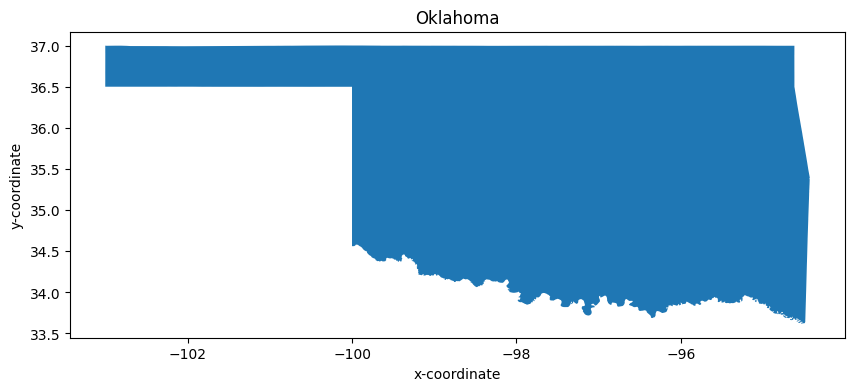

In [ ]:
# visualize the polygon
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
gpd.GeoSeries([polygon]).plot(ax=ax)
ax.set_title('Oklahoma')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

You can observe a much more complex boundary in the real-world map due to the presence of more than 2000 points.

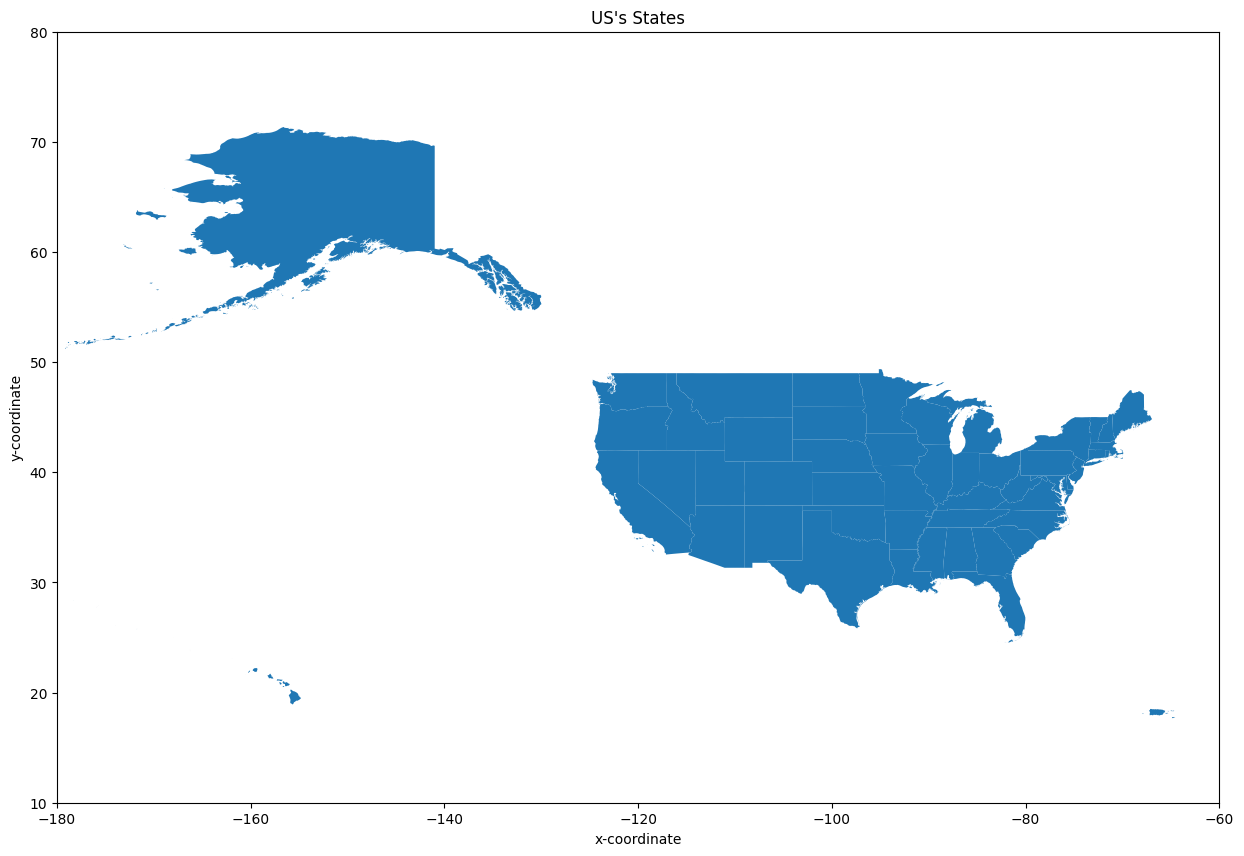

In [ ]:
# visualize the entire GeoDataFrame
gdf_us_by_states.plot(figsize=(15, 15))
plt.xlim(-180, -60)
plt.ylim(10, 80)
plt.title('US\'s States')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

## Coordinate Reference Systems (CRS)


Coordinate Reference Systems (CRS) can be based on a Geographic Coordinate System (GCS) or a Projected Coordinate System (PCS).


### Geographic Coordinate Systems (GCS)

A geographic coordinate system, or some people call it geodetic datum, serves as a reference system for pinpointing locations on the curved surface of the Earth. It employs a three-dimensional spherical surface to establish coordinates on the planet. For instance, in the GCS: World Geodetic System 1984 (WGS84), positions on the Earth's surface are gauged in angular units from the center of the Earth in relation to two planes: the equatorial plane and the prime meridian plane. Consequently, a location is determined by two values: latitude and longitude.

![image.png](https://pygis.io/_images/lat_vs_lon.png)


### Projection and Projected Coordinate Systems (PCS)

Indeed, there lies a challenge with Geographic Coordinate Systems (GCS) as they cannot be directly plotted onto a 2-D space like the Cartesian coordinate system, commonly used for x-y plotting. The maps we typically encounter, such as those seen on Google Maps, are presented in a flat 2-D space. To address this, we require a projection. A map projection serves as the mathematical transformation from angular coordinates into 2-D coordinates. Various types of projections exist, each introducing distortions to real-world geographic features to varying degrees.

![image.png](https://gistbok.ucgis.org/sites/default/files/figure2-projections.png)

A Projected Coordinate System (PCS) encompasses a Geographic Coordinate System (GCS), a projection method used to project the GCS onto a 2-D plane, and additional parameters such as units. It constitutes the comprehensive definition of how a particular spherical Earth model is transformed into a flat map projection.

![image.png](https://i.stack.imgur.com/sSI68.gif)

If you want to learn more about how CRS system is created, here is a great article: https://pygis.io/docs/d_crs_what_is_it.html#d-crs-what-is-it.


### Why do we need a CRS?

When a point, line or polyon is created each point or node has two coordinates x and y. The location of these two points on the ground will change wildly between different GCS and projections. The coordinate pair (0,0) might mean a location just off shore from Ghana with GCS: WGS84 with World Mercator projection , or in the middle of the Pacific ocean in another under different projection with same GCS (i.e. different projections will project the *same* coordinate in the *same* GCS to different linear (x,y) coordinates on a map), or same projection but different GCS (most commonly used GCS is WGS84 and its variant, we barely see other GCS in recent dataset).


![image.png](https://pygis.io/_images/d_crs_assigned.png)

Therefore, every time we create vector data (or receive it from someone else) in a 2-D space, it's crucial to ensure that a projection and GCS is assigned to it. It instructs Python on how to accurately position coordinates on Earths surface.

It worth noting that all map projections introduce error because they are inherently imperfect. The “best” or “perfect” projection to use is highly dependent on what needs to be mapped and where. Therefore, as you can expect, there are many projections to choose from.

### CRS in Python

Let's return to the US States ShapeFile we imported in the previous section. The `crs` attribute will provide the CRS used in the given ShapeFile.

In [5]:
gdf_us_by_states.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

The CRS of this ShapeFiles is `CRS: EPSG:4269`, named `NAD83`, which is commonly used in North America. More detailed information about this CRS can be found at [EPSG: 4269](https://epsg.io/4269). Note: 'NAD83' is a GCS, which mean there is no projection provided in this CRS (or its not a PCS). GeoPandas will assign a default projection to it when plotting.

It's worth noting that `EPSG:4269` is an EPSG code, managed by the European Petroleum Survey Group (EPSG). EPSG maintains a geodetic parameter database with standard codes, known as EPSG codes, for various components like coordinate systems, datums, spheroids, and units. This database also contains parameters or references for these objects, providing comprehensive information.

The EPSG Code serves as a reference for the current CRS in the EPSG database, allowing users to access detailed information about it. To access any CRS with an EPSG code, simply search in the [EPSG](https://epsg.io/) wiki.

### Set and Change CRS

When we create a `GeoDataFrame`, the CRS is not defined in default, we need to use `.set_crs()` function to assign it to `GeoDataFrame`

In [100]:
print('CRS from our line map:', gdf_line.crs)
gdf_line.set_crs(epsg=4326,inplace=True)
print('CRS from our line map:', gdf_line.crs)

CRS from our line map: None
CRS from our line map: EPSG:4326


`EPSG:4326`, also known as World Geodetic System 1984, is widely used as a CRS globally. By specifying the EPSG Code of the desired CRS, the `GeoDataFrame` can retrieve the necessary information from the EPSG database and adjust the coordinates of vector shapes accordingly.



We can change the CRS system in current `GeoDataFrame` using `.to_crs()` function

In [103]:
# change CRS in the GeoDataFrame (sepcify the EPSG code)
gdf_line.to_crs(epsg=2011,inplace=True)
print('CRS from our line map:', gdf_line.crs)

CRS from our line map: EPSG:2011


In our previous example, the projection of vector shapes would essentially be an identity mapping if no specific (CRS) is assigned. However, it's important to note that this identity mapping wouldn't hold true on a spheroid due to the curvature of the Earth.


### Comparsion between different CRS
We can also switch to alternative CRS options and explore the variations between them.

In [34]:
# for better visualization, removed non-mainland states, such as alaska, hawaii, and islands.
gdf_mainland_us = gdf_us_by_states[~gdf_us_by_states['NAME'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]


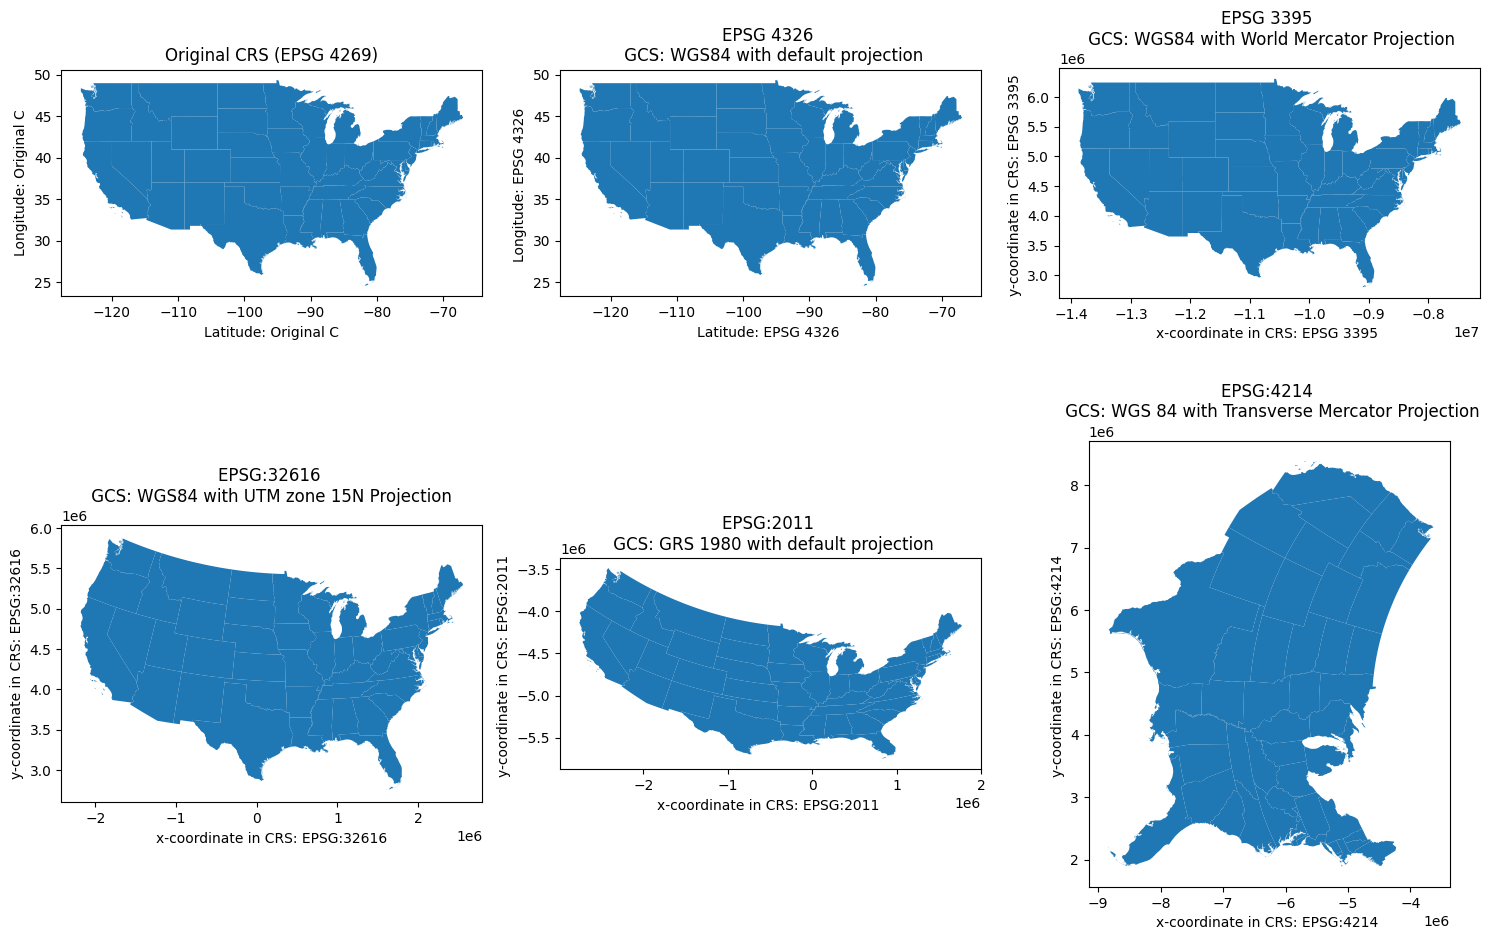

In [86]:
# Define CRS options
crs_options = [
    ("Original CRS (EPSG 4269)", gdf_mainland_us), # Plot Name, GeoDataFrame
    ("EPSG 4326 \n GCS: WGS84 with default projection", gdf_mainland_us.to_crs('EPSG:4326')),

    #EPSG code as a string
    ("EPSG 3395 \n GCS: WGS84 with World Mercator Projection", gdf_mainland_us.to_crs('EPSG:3395')),

    # Change CRS by name
    ("EPSG:32616 \n GCS: WGS84 with UTM zone 15N Projection ", gdf_mainland_us.to_crs("WGS 84 / UTM zone 15N")),

    # using epsg parameter
    ("EPSG:2011 \n GCS: GRS 1980 with default projection", gdf_mainland_us.to_crs(epsg=7789)),

    ("EPSG:4214 \n GCS: WGS 84 with Transverse Mercator Projection", gdf_mainland_us.to_crs("EPSG:27700"))
]

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each CRS
for i, (title, gdf) in enumerate(crs_options):
    gdf.plot(ax=ax[i],figsize=(5, 5))
    ax[i].set_title(title)
    if i < 2:
      ax[i].set_xlabel('Latitude: ' + title[0:10])
      ax[i].set_ylabel('Longitude: ' + title[0:10])
    else:
      ax[i].set_xlabel('x-coordinate in CRS: ' + title[0:10])
      ax[i].set_ylabel('y-coordinate in CRS: ' + title[0:10])

# Show plot
plt.tight_layout()
plt.show()

Can you observe any differences in the above plots?

The coordinates exhibited in some plots deviate from others. This variance results in distinct orientations of the vector shapes, potentially impacting your analysis. For instance, a point represented as (40,-120) might fall within US States in the EPSG4326 projection, but lie somewhere in the sea under EPSG3395.

Shape is also different in different projections or GCS.

## Geo-Coding and Reverse Geo-Coding

Geocoding is the process of converting addresses (like "1600 Amphitheatre Parkway, Mountain View, CA") into geographic coordinates (like latitude 37.423021 and longitude -122.083739), which you can use to place markers on a map, or position the map.

Reverse geocoding is the opposite process. It involves converting geographic coordinates into a human-readable address. So, you input latitude and longitude coordinates, and the reverse geocoding service provides you with the corresponding address or location information.

In [122]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("27 King's College Cir, Toronto, ON M5S 1A1") #uoft address

print(location.latitude, location.longitude)

43.6607231 -79.39592001845992


In [161]:
# You dont need to know how to plot this map in this lab
import folium
map = folium.Map(location=[43.6607231, -79.39592001845992], zoom_start=13)
folium.Marker((location.latitude, location.longitude), popup='UofT').add_to(map)
map

![](https://drive.google.com/uc?export=view&id=1G5en4LOploTvSAOxWLAygCfOK2pyTQRj)

In [119]:
# Reverse geo-coding
address = geolocator.reverse("43.6452, -79.3806")
print(address.address)

Union Station, 140, Bay Street, South Core, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5J 2L5, Canada


## More Example on Geo-Fencing

We can use geo-coding to create a real-life example in geo-fencing in a few lines of code. For example, we have a list of addresses in Toronto, and we want to check whether each of them is in downtown Toronto or not.

In [176]:
address_lst = ['290 Bremner Blvd, Toronto, ON M5V 3L9',
 '1 Austin Terrace, Toronto, ON M5R 1X8',
 '770 Don Mills Rd., North York, ON M3C 1T3',
 '77 Wynford Dr, North York, ON M3C 1K1']
# geo-coding to latitude and longitude
geolocator = Nominatim(user_agent="my_app")
address_coded = [geolocator.geocode(address) for address in address_lst]
#create list of point objects using this geo-coding
list_of_points = [Point(i.latitude,i.longitude) for i in address_coded]
list_of_points

[<POINT (43.643 -79.387)>,
 <POINT (43.678 -79.409)>,
 <POINT (43.715 -79.34)>,
 <POINT (43.725 -79.332)>]

In [174]:
import folium
from shapely.geometry import Polygon

# Define coordinates for downtown Toronto boundary
downtown_toronto_boundary = [(43.68332301188323, -79.41832982140303),
 (43.63659467805622, -79.3998381602896), (43.65214101062051, -79.34847901920116),
  (43.69235150490925, -79.3692961282509)]
# Create a polygon
downtown_polygon = Polygon(downtown_toronto_boundary)

### YOU DO NOT NEED TO KNOW THIS PART OF CODE###
# Create a map centered around Toronto
map_toronto = folium.Map(location=[43.651070, -79.384680], zoom_start=12)

# Add the polygon to the map
folium.Polygon(locations=downtown_polygon.exterior.coords[:],
               color='blue', fill=True, fill_color='blue',
               fill_opacity=0.3).add_to(map_toronto)

# Display the map
map_toronto




![](https://drive.google.com/uc?export=view&id=1-jPeSJnZiyNRwEbl3b4sFsyzS40yuPXO)

In [175]:
for point in list_of_points:
  if downtown_polygon.contains(point):
    folium.Marker((point.x, point.y), popup='within',icon=folium.Icon(color='blue')).add_to(map_toronto)
  else:
    folium.Marker((point.x, point.y), popup='out',icon=folium.Icon(color='red')).add_to(map_toronto)
map_toronto



![](https://drive.google.com/uc?export=view&id=1rEEqTfZdTvODgDrM4f-X6wsrO0InKX9o)

## Spatial Data Analysis

After we settle with the valid shapefiles and correct CRS, we can finally begin our analysis. However, 'ShapeFile' only contains the geographical shapes of each location and a limited number of attributes (e.g., Name, ID). We still need additional datasets that align with our interests. In this lab, we will utilize data on COVID infections rate (the confirmed cases) in different states of the US over time.

### Total Confirmed Cases by States

Johns Hopkins University maintains a comprehensive dataset that records the total number of infection and death cases in United States, updated daily. In this lab, we will utilize the 'Confirmed Cases' data from this dataset. It contains total COVID-19 confirmed cases extracted from JHU database by counties in US from Jan 22, 2020 to March 09th, 2023.

More information about this dataset https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [ ]:
# read the data as a pandas DataFrame
confirmed_case = pd.read_csv('https://github.com/MIE223-2024/course-datasets/raw/main/time_series_covid19_confirmed_US.csv')
confirmed_case.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


It's worth noting that each column represents the cumulative cases from the **first day** of the records to the current date (indicated in the column name), rather than the newly confirmed cases.

Let's check some basic statistic

In [ ]:
# check the shape of the data
print(f'Number of Columns: {confirmed_case.shape[1]} and Number of Samples: {confirmed_case.shape[0]}')

# missing values
missing = pd.isnull(confirmed_case).sum()
print('Missing: ', [i for i in missing[missing  > 0].items()])

print('Number of unique Country_Region: ', confirmed_case['Country_Region'].nunique()) # since the data is for US, we expect 1
print('Number of unique Province_State: ', confirmed_case['Province_State'].nunique()) # number of states in the US

Number of Columns: 1154 and Number of Samples: 3342
Missing:  [('FIPS', 10), ('Admin2', 6)]
Number of unique Country_Region:  1
Number of unique Province_State:  58


"FIPS" refers to the Federal Information Processing Standards code, which uniquely identifies counties within the USA. The "Admin2" column contains county names. As we are solely examining the data by states, these missing values will not affect our study in this lab.

Additionally, we have observed that there are 58 provinces, states, and regions in this dataset, but we only have 56 vector shapes in the previously imported 'ShapeFile'. Let's examine the difference.

In [ ]:
states_in_shapefile = gdf_us_by_states['NAME'].unique()
states_in_confirmed_case = confirmed_case['Province_State'].unique()

# check the difference between the two lists
print('States in the confirmed case but not in the shape files: ',  set(states_in_confirmed_case) - set(states_in_shapefile))
print('States in the shape files but not in the confirmed case: ',  set(states_in_shapefile) - set(states_in_confirmed_case))

States in the confirmed case but not in the shape files:  {'Virgin Islands', 'Diamond Princess', 'Northern Mariana Islands', 'Grand Princess'}
States in the shape files but not in the confirmed case:  {'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands'}


('Virgin Islands', 'United States Virgin Islands') and ('Commonwealth of the Northern Mariana Islands', 'Northern Mariana Islands') can be easily rectified as the only difference lies in their names.

However, 'Grand Princess' and 'Diamond Princess' are missing from the shapefile as they are cruise ships. Check this news https://www.latimes.com/california/story/2020-03-04/los-angeles-county-declares-coronavirus-emergency-6-new-cases about the covid outbreak in 'Grand Princess' cruise ship.

For simplicity in this lab, we will omit the rows that do not represent mainland states (such as Alaska, islands, cruises, and others). Nevertheless, you can certainly find the shapefiles for these locations online and integrate them into the GeoDataFrame. Ensure to pay attention to the CRS in different files.

In [ ]:
# dropping columns that are not needed in this analysis
confirmed_case.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], inplace=True)
# remove the rows that are not mainland states
confirmed_case = confirmed_case[~confirmed_case['Province_State'].isin(['Diamond Princess', 'Grand Princess','Northern Mariana Islands',
                                                                        'American Samoa', 'Guam', 'Virgin Islands',
                                                                        'Puerto Rico', 'Alaska', 'Hawaii'])]
# aggregate the data by states (from counties to states)
confirmed_case_by_states = confirmed_case.groupby('Province_State').sum()
confirmed_case_by_states.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1638348,1642062,1642062,1642062,1642062,1642062,1642062,1642062,1644533,1644533
Arizona,0,0,0,0,1,1,1,1,1,1,...,2434631,2440294,2440294,2440294,2440294,2440294,2440294,2440294,2443514,2443514
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1004752,1004752,1005212,1005464,1005790,1005847,1005930,1006336,1006622,1006883
California,0,0,0,0,2,2,2,2,2,3,...,12097613,12097613,12107856,12110179,12110179,12110179,12110179,12120965,12120965,12129699
Colorado,0,0,0,0,0,0,0,0,0,0,...,1760491,1761332,1761332,1763021,1763021,1763021,1763574,1763574,1764401,1764401


To simplify the dataset for this lab, we will aggregate each sample from daily cases to monthly cases.

In [ ]:
#merge by month
confirmed_case_by_states = confirmed_case_by_states.T
#reforamt the index to datetime
confirmed_case_by_states.index =  pd.to_datetime(confirmed_case_by_states.index, format='%m/%d/%y')
# Since it's total cases from the first day to the current date,
# we only need to keep the data for the last day of each month to represent the entire month.
confirmed_case_by_states = confirmed_case_by_states.resample('M').last()
# drop the last incomplete month
confirmed_case_by_states = confirmed_case_by_states.iloc[:-1].T.reset_index()
# rename the columns to the month and year
confirmed_case_by_states.columns = ['Province_State'] + [x.strftime('%m-%Y') for x in confirmed_case_by_states.columns[1:]]
confirmed_case_by_states.head()

,Province_State,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,09-2020,...,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023
0,Alabama,0,0,1063,7187,18200,38477,88266,126500,154772,...,1314963,1357266,1424411,1479605,1522135,1534287,1549285,1568934,1610535,1638348
1,Arizona,1,1,1289,7655,19936,79228,174010,201835,218507,...,2049627,2125567,2196429,2254374,2271560,2287886,2337547,2378334,2398200,2434631
2,Arkansas,0,0,523,3281,7253,20777,42511,61224,83697,...,843362,865592,903931,932639,951644,959855,968871,985493,996758,1004752
3,California,3,13,8011,50711,113865,240802,506927,713644,821473,...,9620714,10137736,10709862,11100962,11269808,11373188,11541655,11835094,12001858,12097613
4,Colorado,0,0,2966,19767,29015,36281,51540,60938,76720,...,1489132,1552898,1603212,1631016,1654798,1674883,1708264,1734782,1749006,1760491


### Time Series Plot

In the previous lab, we learned about time series and some useful techniques associated with it. We can certainly plot the confirmed cases of states over time in a time series format.

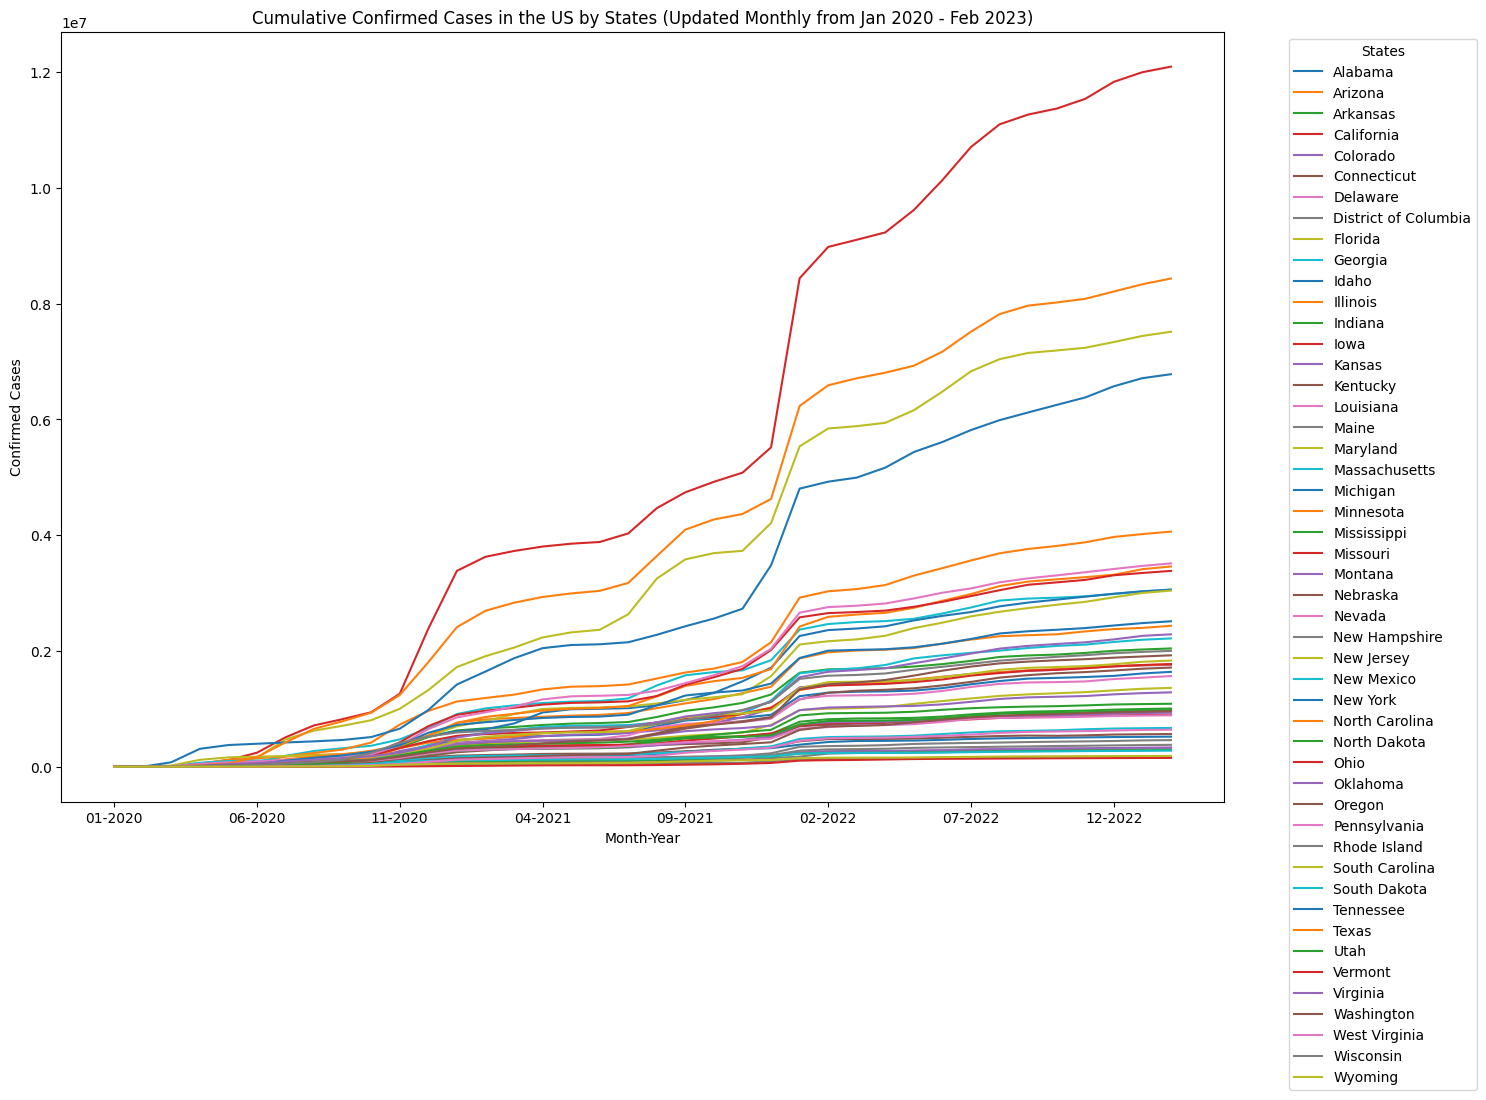

In [ ]:
#plot the confirmed cases in the US
tem = confirmed_case_by_states.T.iloc[1:]
tem.columns = confirmed_case_by_states['Province_State']
tem.plot(figsize=(15, 10))
plt.title('Cumulative Confirmed Cases in the US by States (Updated Monthly from Jan 2020 - Feb 2023)')
# improve legend visibility
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Month-Year')
plt.ylabel('Confirmed Cases')
plt.show()

We can also plot the delta (difference) between two timestamp

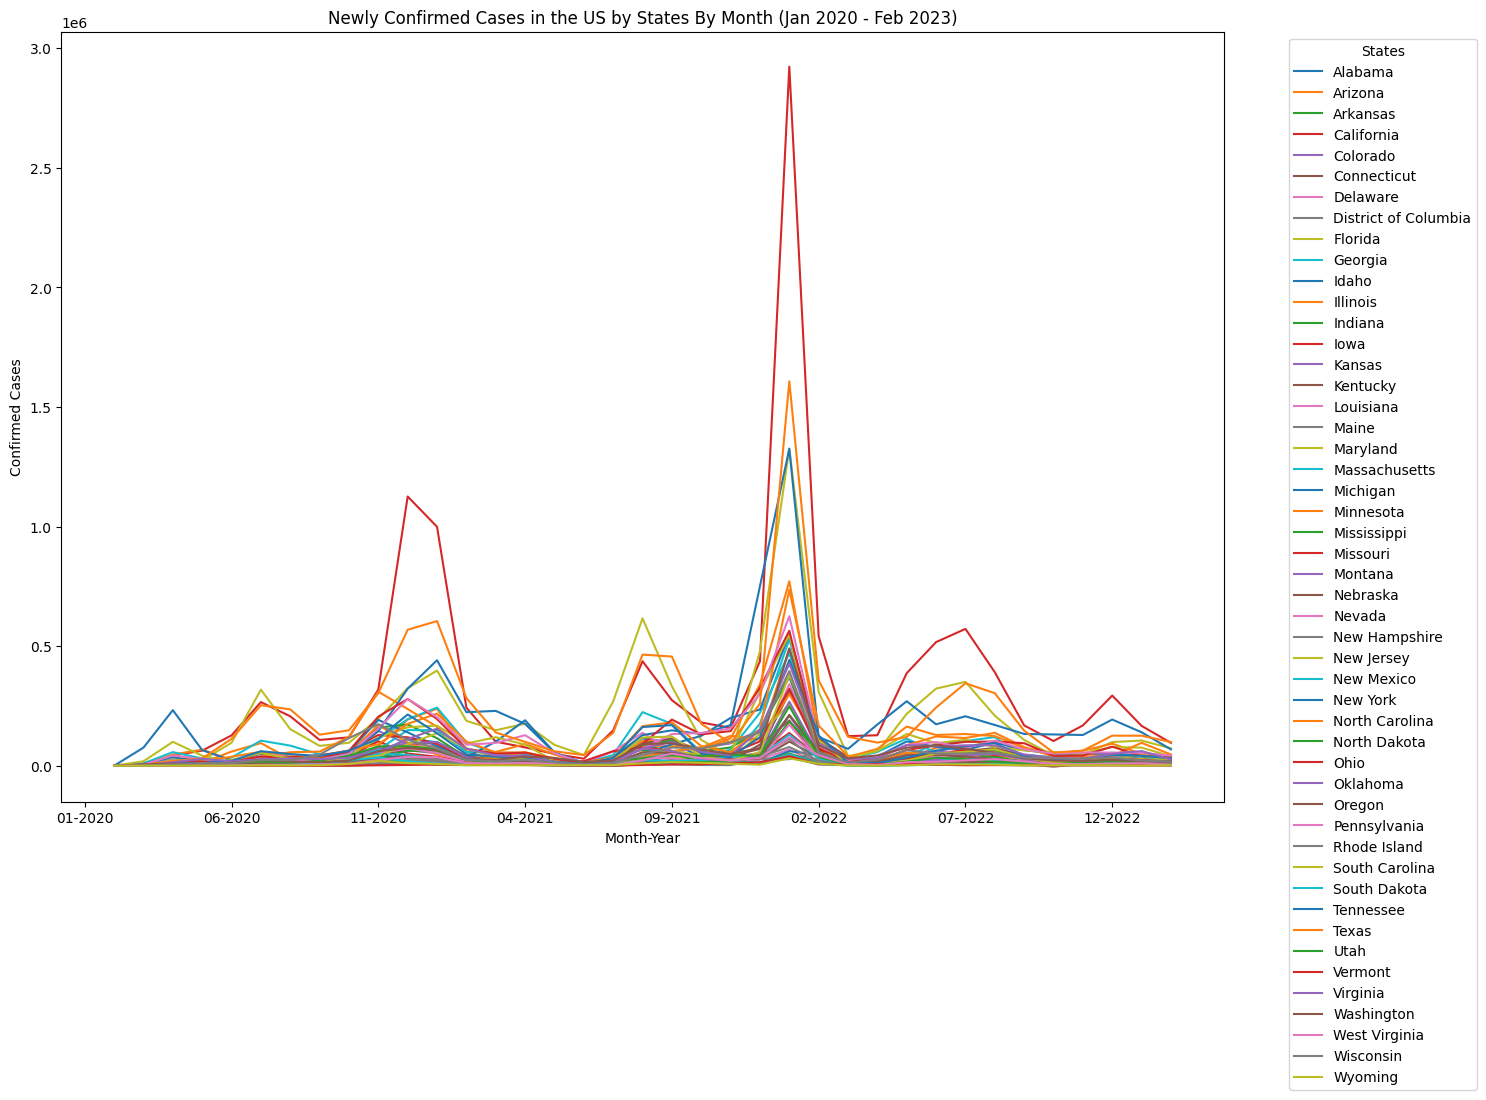

In [ ]:
#calculating the difference in confirmed cases between months
tem = confirmed_case_by_states.T.iloc[1:].diff()
tem.columns = confirmed_case_by_states['Province_State']
tem.plot(figsize=(15, 10))
plt.title('Newly Confirmed Cases in the US by States By Month (Jan 2020 - Feb 2023)')
# improve legend visibility
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Month-Year')
plt.ylabel('Confirmed Cases')
plt.show()

Do you notice any problems? Although we can observe the trend of confirmed cases, and seasonaility peaks (waves) over time using a time series plots, there are two issues:
- Large sample sizes will result in a very long legend that is difficult to interpret and compare.
- We lose the geographical information associated with each sample in the time series plot, preventing us from examining their spatial relationships.

### Basic Choropleth

We need to merge the Confirmed Case DataFrame with the GeoDataFrame from the shapefile to incorporate spatial information into each sample.

In [ ]:
gdf_us_by_states = gdf_us_by_states.rename(columns={'NAME': 'Province_State'})
# Merge the GeoDataFrame with the confirmed cases DataFrame based on the State name
gdf_covid_confirmed = gdf_us_by_states[['Province_State', 'geometry']].merge(confirmed_case_by_states)
#Make sure you convert the DataFrame to GeoDataFrame after merging (in default, it's a DataFrame)
gdf_covid_confirmed = gpd.GeoDataFrame(gdf_covid_confirmed)
gdf_covid_confirmed.head()

,Province_State,geometry,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023
0,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0,0,937,6815,15523,27247,58747,82950,...,808338,835120,875132,913049,927465,933065,940023,955145,977790,987105
1,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0,0,1578,11120,29514,67226,125678,172879,...,2744935,2867218,2983130,3120822,3198866,3237440,3275343,3316814,3412542,3459600
2,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0,0,568,3618,6418,13757,36487,58733,...,1049849,1076350,1120934,1170225,1197762,1208316,1220720,1250013,1270476,1284450
3,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0,0,1249,15847,44607,62787,89888,120594,...,1787756,1869231,1954716,2040106,2087360,2120280,2149512,2199302,2260796,2287440
4,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0,0,162,1125,2010,2905,6579,10249,...,515925,532503,555107,582666,600558,608104,614646,624721,634541,639246


GeoPandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors. When plotting a map, one can enable a legend using the `legend` argument. And changing the style of legend using `legend_kwds`.

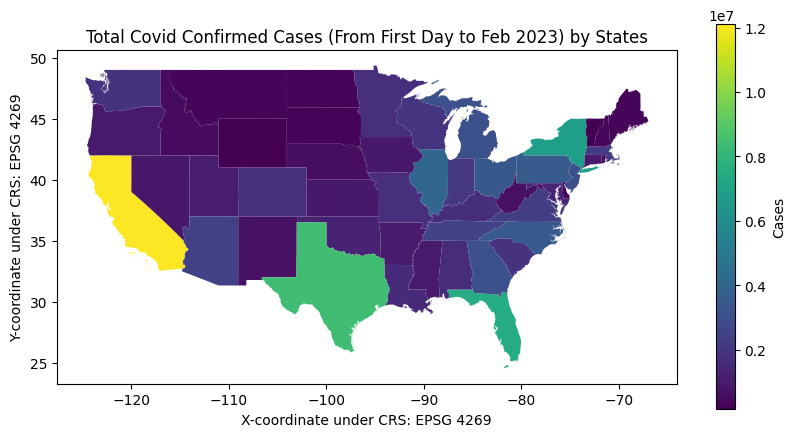

In [ ]:
gdf_covid_confirmed.plot(figsize=(10, 5), column='02-2023',
                         legend=True, # include the legend
                         legend_kwds={"label": "Cases"}) # legend style
plt.title('Total Covid Confirmed Cases (From First Day to Feb 2023) by States')
plt.xlabel('X-coordinate under CRS: EPSG 4269')
plt.ylabel('Y-coordinate under CRS: EPSG 4269')

plt.show()

You can also modify the color map used by plot() with the `cmap` option, and adding label by some condition

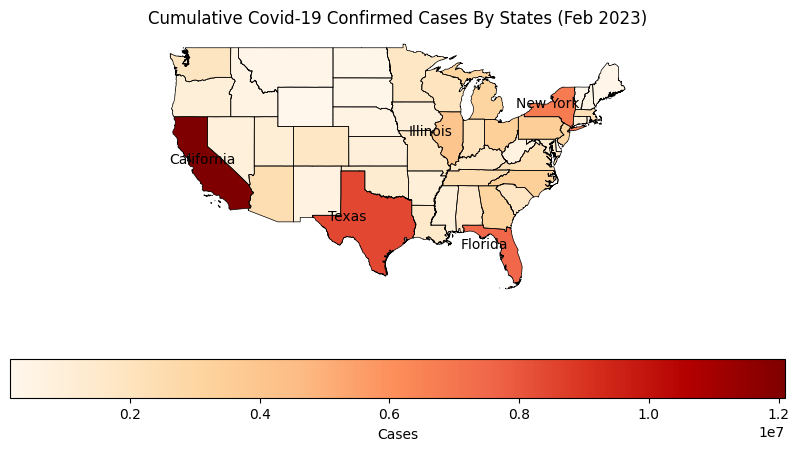

In [ ]:
gdf_covid_confirmed.plot(figsize=(10, 5), column='02-2023',
                         legend=True,cmap='OrRd',
                         legend_kwds={"label": "Cases", "orientation": "horizontal"}) # change the legend style

# plot the boundary of the states
gdf_covid_confirmed.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)

# label the top 5 states with the highest confirmed cases
max_cases_state = gdf_covid_confirmed.nlargest(5, '02-2023')
for x, y, label in zip(max_cases_state.geometry.centroid.x,
                       max_cases_state.geometry.centroid.y,
                       max_cases_state['Province_State']):
    plt.gca().annotate(label, xy=(x, y), xytext=(-30, 0), textcoords="offset points")

plt.title('Cumulative Covid-19 Confirmed Cases By States (Feb 2023)')
plt.axis('off') # Or we can remove the axis
plt.show()

### COVID-19 Confirmed Cases By Population

The total number of confirmed cases may present certain challenges. For instance, states with larger areas or higher populations may also exhibit higher total confirmed cases, alongside the potential influence of other latent variables.

To address this, we can recalibrate the total confirmed cases using various factors, such as the population of each state and its land area. In this lab, we will focus on cases'cases per population'.

Furthermore, it's important to note that sometimes the default interval of color encoding may not align with our requirements. We can customize the method of defining these intervals using the `scheme` parameter. For instance, we can base each color on the quantiles of the given data.

In [ ]:
# obtain the area of each state
state_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/NST-EST2023-ALLDATA.csv')[['NAME', 'POPESTIMATE2023']]
state_population.columns = ['Province_State', 'Population']
# merge the population DataFrame with the GeoDataFrame
state_population.head()

,Province_State,Population
0,United States,334914895
1,Northeast Region,56983517
2,New England,15159777
3,Middle Atlantic,41823740
4,Midwest Region,68909283


In [ ]:
# merge the population DataFrame with the GeoDataFrame
gdf_covid_confirmed = gdf_covid_confirmed.merge(state_population, on='Province_State')

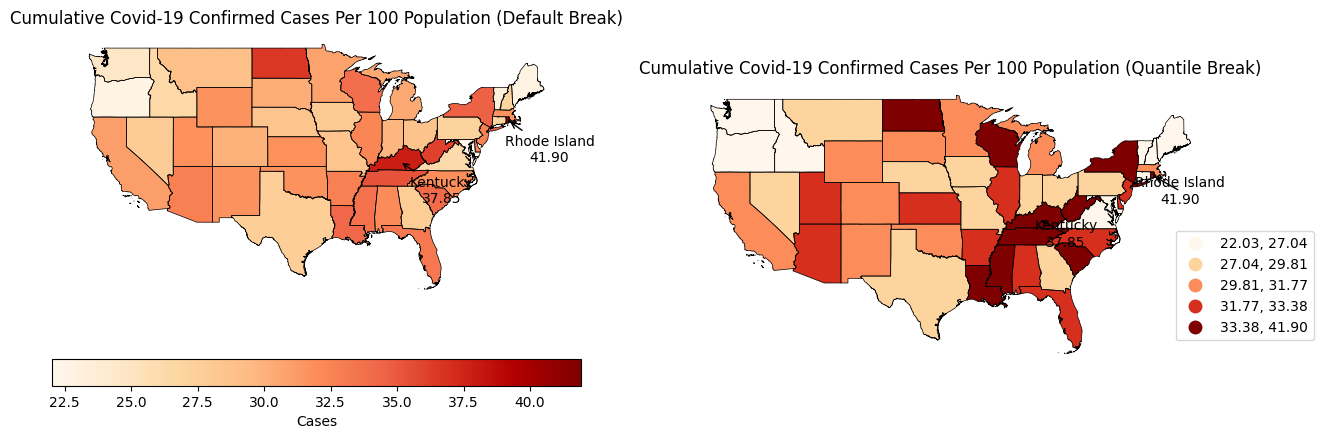

In [ ]:
# get current month's data
current_month = gdf_covid_confirmed[['Province_State','02-2023','geometry','Population']]
# calculate the confirmed cases per 100 people in the state
current_month['Density'] = current_month['02-2023'] / current_month['Population'] * 100

# visualize the density
fig,ax  = plt.subplots(1, 2, figsize=(15, 5))

# By default scheme
current_month.plot(ax=ax[0], column='Density', cmap='OrRd',legend=True,
                   figsize=(5, 5),legend_kwds={"label": "Cases", "orientation": "horizontal"})
gdf_covid_confirmed.boundary.plot(ax = ax[0], color='k', linewidth=0.5) # plot the boundary of the states
ax[0].set_title('Cumulative Covid-19 Confirmed Cases Per 100 Population (Default Break)')
ax[0].axis('off')

# By quantile scheme
current_month.plot(figsize=(5, 5), column='Density',scheme='quantiles',
                   cmap='OrRd',legend=True,ax=ax[1],
                   legend_kwds={"bbox_to_anchor": (1.2, 0.5)}) #ensure the legend does not block the map
# plot the boundary of the states
gdf_covid_confirmed.boundary.plot(ax = ax[1], color='k', linewidth=0.5)
ax[1].set_title('Cumulative Covid-19 Confirmed Cases Per 100 Population (Quantile Break)')
ax[1].axis('off') # Or we can remove the axis

# label the top 2 states with the highest confirmed cases by its name and value
max_cases_state = current_month.nlargest(2, 'Density') # get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Density']):
    ax[0].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))
    ax[1].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.show()

There is a notable difference between total confirmed cases and cases per 100 population.

 While Texas may have a large number of confirmed cases, its 'cases per 100 population' is relatively low. This suggests that the total number of confirmed cases may be influenced by factors such as population size. However, some states, such as North Dakota, even if they have very low total cases, still have a very high 'cases per 100 population'. Cases per 100 population provides a more standardized measure for comparison across different regions.

### Choropleth Across Time

We can also plot multiple choropleths side by side to examine the change in distribution across time.

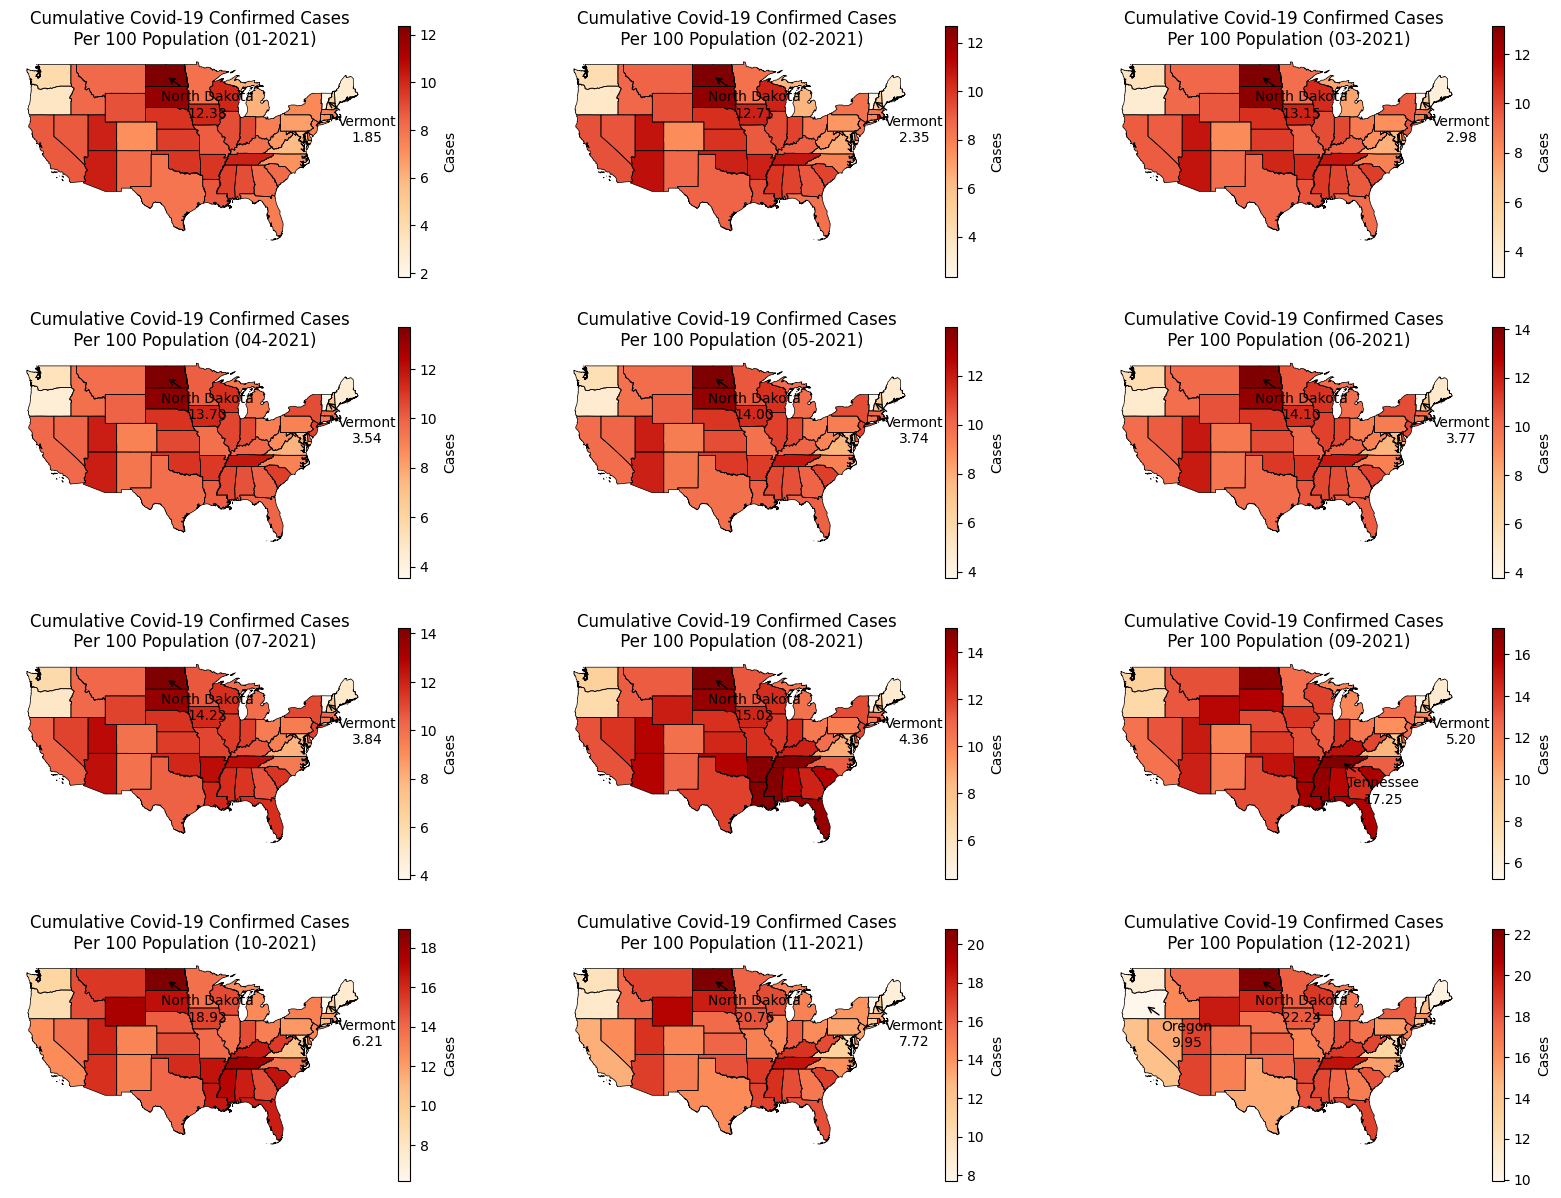

In [ ]:
def choropleth_by_month(gdf, year, ax, title) -> None:
    # get year data
    current_year = [col for col in gdf.columns if year in col]
    # plot the data
    for i, month in enumerate(current_year):
        # select the month and calculate the density
        gdf_density = gdf[['Province_State', month, 'geometry',
                           'Population']]
        # calculate the density
        gdf_density['Density'] = gdf_density[month] / (gdf_density['Population']) * 100
        # plot the data
        gdf_density.plot(ax=ax[i], column='Density',
                         cmap='OrRd',legend=True,legend_kwds={"label": "Cases"})

        # plot the boundary of the states
        gdf.boundary.plot(ax = ax[i], color='k', linewidth=0.5)

        # label states with the highest and lowest cases per 100 population
        max_cases_state = gdf_density.nlargest(1, 'Density')
        min_cases_state = gdf_density.nsmallest(1, 'Density')

        for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                                     max_cases_state.geometry.centroid.y,
                                     max_cases_state['Province_State'],
                                     max_cases_state['Density']):
            ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                           textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        for x, y, name, value in zip(min_cases_state.geometry.centroid.x,
                                        min_cases_state.geometry.centroid.y,
                                        min_cases_state['Province_State'],
                                        min_cases_state['Density']):
                ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                            textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

        ax[i].set_title(title + f' ({month})')
        ax[i].set_axis_off()
    plt.show()

fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
choropleth_by_month(gdf_covid_confirmed,  '-2021', ax,
                    'Cumulative Covid-19 Confirmed Cases \n Per 100 Population')

Did you notice any problem? We cannot discern any differences between months.

This is because we are using the total number of confirmed cases instead of the newly confirmed cases in particular month (the difference between current month and previous month). States with higher case density, such as North Dakota, will always dominate the ranking.

It is hard for us to detect  any geological hotspot of COVID-19 outbreak across time using this map.

### Choropleth Across Time By Newly Confirmed Cases

Instead, we can derive the newly confirmed cases in each month by calculating the difference in total cases between the current month and the previous month. Similiar to what we did in Time Series Plot.

In [ ]:
def get_difference_between_timestamp(gdf) -> gpd.GeoDataFrame:
    # select columns that are not 'Province_State', 'geometry', and 'Population'
    col = [col for col in gdf.columns if col not in ['Province_State', 'geometry', 'Population']]
    gdf_newly_confirmed = gdf[col].diff(axis=1)
    # remove negative values (we only need the newly confirmed cases)
    gdf_newly_confirmed = gdf_newly_confirmed.clip(lower=0)
     # adding the first month's data
    gdf_newly_confirmed.iloc[:,0] = gdf[col[0]]
    # add the 'Province_State', 'geometry', and 'Population' columns
    gdf_newly_confirmed = gdf[['Province_State', 'geometry', 'Population']].join(gdf_newly_confirmed)
    # Every time we use a pandas function, we need to ensure that the result is
    # converted back to a GeoDataFrame if we intend to work with geographic data.
    gdf_newly_confirmed = gpd.GeoDataFrame(gdf_newly_confirmed)

    return gdf_newly_confirmed

gdf_newly_confirmed = get_difference_between_timestamp(gdf_covid_confirmed)
gdf_newly_confirmed.head()

,Province_State,geometry,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,...,05-2022,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023
0,Mississippi,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",2939690,0,0,937,5878,8708,11724,31500,...,10763,26782,40012,37917,14416,5600,6958,15122,22645,9315
1,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",10835491,0,0,1578,9542,18394,37712,58452,...,85680,122283,115912,137692,78044,38574,37903,41471,95728,47058
2,Oklahoma,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",4053824,0,0,568,3050,2800,7339,22730,...,8867,26501,44584,49291,27537,10554,12404,29293,20463,13974
3,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",8715698,0,0,1249,14598,28760,18180,27101,...,86298,81475,85485,85390,47254,32920,29232,49790,61494,26644
4,West Virginia,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",1770071,0,0,162,963,885,895,3674,...,14721,16578,22604,27559,17892,7546,6542,10075,9820,4705


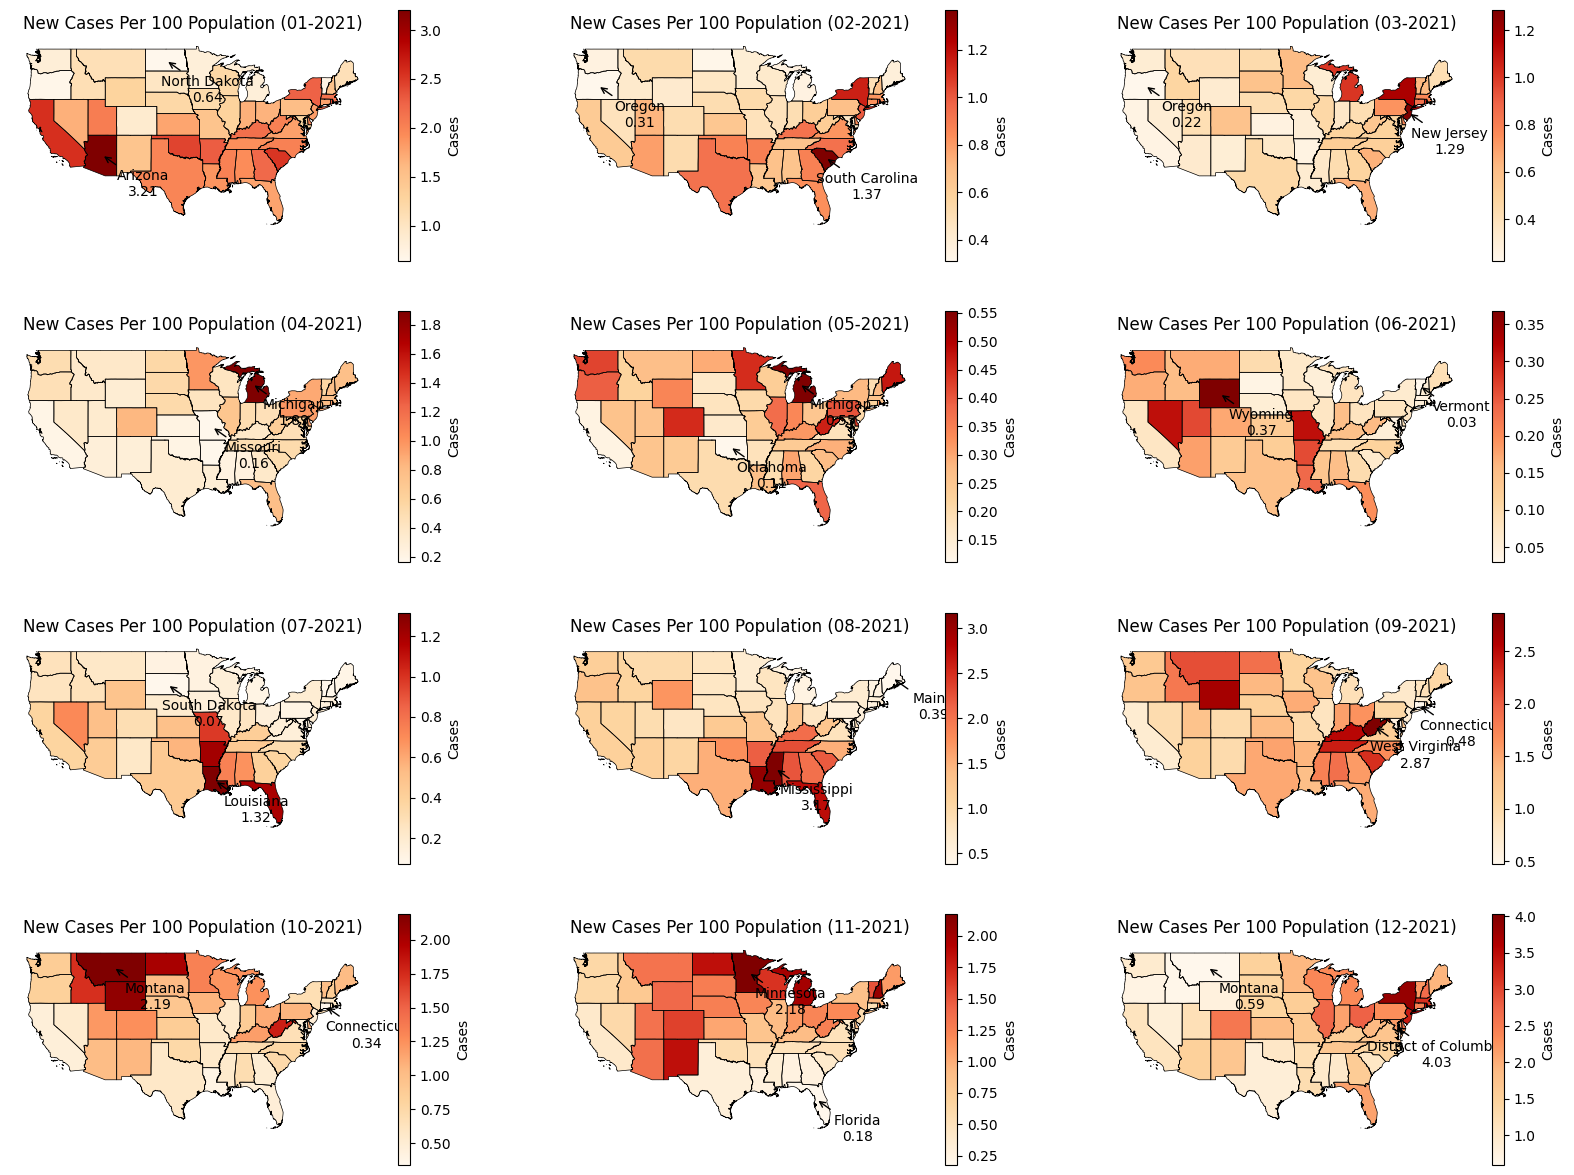

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
choropleth_by_month(gdf_newly_confirmed, '-2021',ax,
                    title='New Cases Per 100 Population')

Utilizing this updated map, we can discern the COVID-19 outbreak hotspots across various months in 2021. For instance, Arizona exhibited the highest confirmed cases in January 2021, but saw significantly lower confirmed cases in April 2021. This highlights the dynamic nature of hotspots, which shift throughout the year. Moreover, there are numerous other insights we can glean from the visualization.

Nevertheless, plotting the choropleth maps side by side allows us to directly visualize the spatial distribution of values across time. However, as the number of timestamps increases, it becomes impractical to plot them side by side.

### Choropleth By Simple Regression

Additionally, we can apply a straightforward regression model, such as \( y = \text{slope} \times x + \text{intercept} \), to the confirmed cases over time in each state. Utilizing the slope of the fitted regression line as the representation of each sample, we can estimate the rate of increase for each state over time. This method provides a means to quantify and compare the varying rates of COVID-19 spread across different states throughout the observed period.

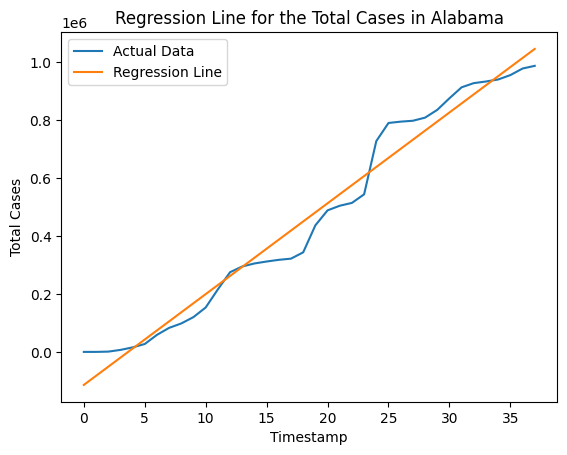

In [ ]:
# you already familiar with this in previous labs
def linear_regression(sample):
    x = range(len(sample))
    y = sample
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # Calculate the slope (m) and intercept (b) of the regression line
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)
    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return slope, intercept

# for example, lets calculate the linear regression for the total cases in Alabama
col = [col for col in gdf_covid_confirmed.columns if col not in ['Province_State', 'geometry', 'Population']]
slope, intercept = linear_regression(gdf_covid_confirmed.loc[0,col].tolist()) # get the slope and intercept
plt.plot(range(len(gdf_covid_confirmed.loc[0,col])),
         gdf_covid_confirmed.loc[0,col], label='Actual Data')
plt.plot(range(len(gdf_covid_confirmed.loc[0,col])),
          [slope*x + intercept for x in
           range(len(gdf_covid_confirmed.iloc[1,1:-2]))],
         label='Regression Line')

plt.title('Regression Line for the Total Cases in Alabama')
plt.xlabel('Timestamp')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

Using the slope of fitted line for every sample, we can plot them as the value of samples in choropleth

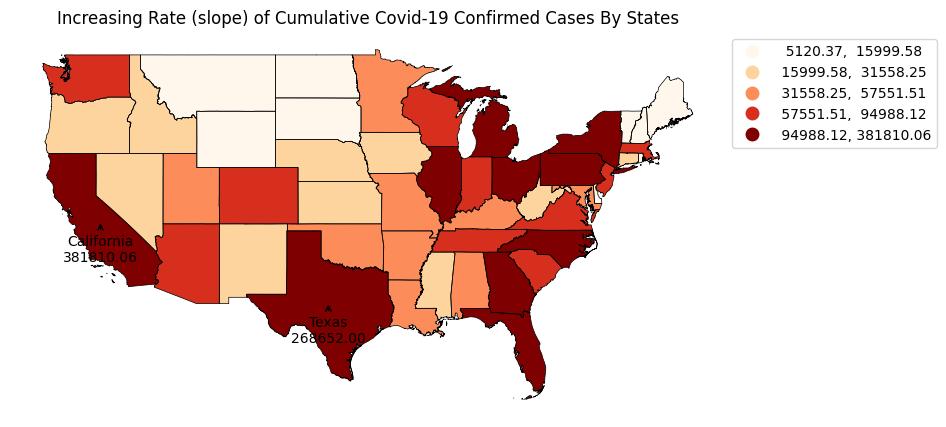

In [ ]:
gdf_increase_rate = gdf_covid_confirmed.copy()
# calculate the slope for each state
col = [col for col in gdf_increase_rate.columns if col not in ['Province_State', 'geometry', 'Population']]
gdf_increase_rate['slope'] = gdf_increase_rate.apply(lambda x: linear_regression(x[col])[0], axis=1)
# choropleth based on the slope
gdf_increase_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',
                       legend=True,scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1),
                                      'loc': 'upper left'})
gdf_increase_rate.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())

# label the top 2 states with the highest increase rate
max_cases_state = gdf_increase_rate.nlargest(2, 'slope') # get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['slope']):
    plt.gca().annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(0, -30),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Increasing Rate (slope) of Cumulative Covid-19 Confirmed Cases By States')
plt.axis('off')
plt.show()


### Detecting Correlation using Choropleth

We can also utilize Choropleth to check the correlation between data, such as Population Density (In this Lab), or Vaccination Rate (In Assignment) vs. Covid Cases.

To check the correlation, we need to calculate the population density. In the previous section, we already have the estimated total population in 2023. We only need the area of each state to calculate the population density. There are two ways to do this:

- Obtaining the actual area of each state from a different dataset and merging it.
- Since we only want to compare the correlation between two variables, we do not need the actual value of population density. Instead, we can use the area of the geometry shape to calculate the ratio of each state's population density (The relationship will be the same but on a different scale).

We will use the second method in this lab

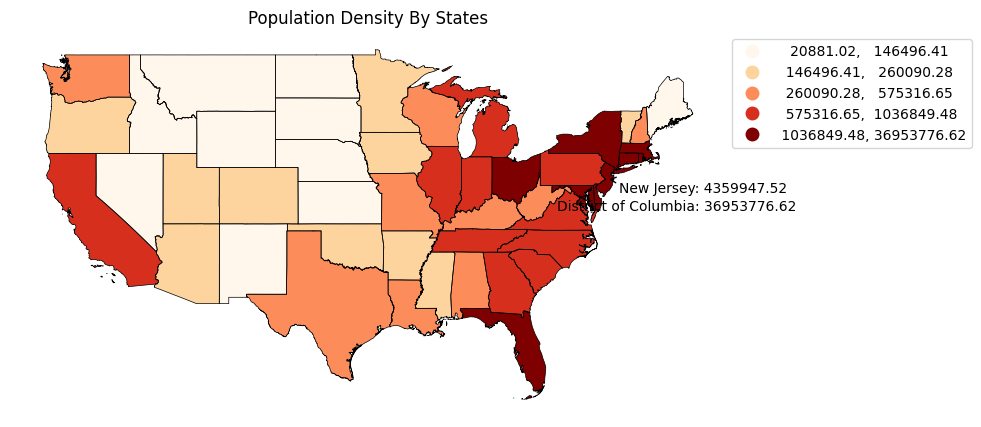

In [ ]:
gpf_pop_density = gdf_covid_confirmed[['Province_State', 'Population','geometry']]
# calculate the population density
gpf_pop_density['Pop Density'] = gpf_pop_density['Population'] / (gpf_pop_density['geometry'].area) # area of geometry polygon
gpf_pop_density.plot(figsize=(10, 5), column='Pop Density', cmap='OrRd',
                     legend=True,scheme='quantiles',legend_kwds={"bbox_to_anchor": (1, 1), 'loc': 'upper left'})
gpf_pop_density.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())

# label the top 2 states with the highest population density
max_cases_state = gpf_pop_density.nlargest(2, 'Pop Density') # get the top 2 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Pop Density']):
    plt.gca().annotate(f'{name}: {value:.2f}', xy=(x, y), xytext=(70, -10),
                     textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Population Density By States')
plt.axis('off')
plt.show()

We can compare the population density with the increaing rate choropleth we just created

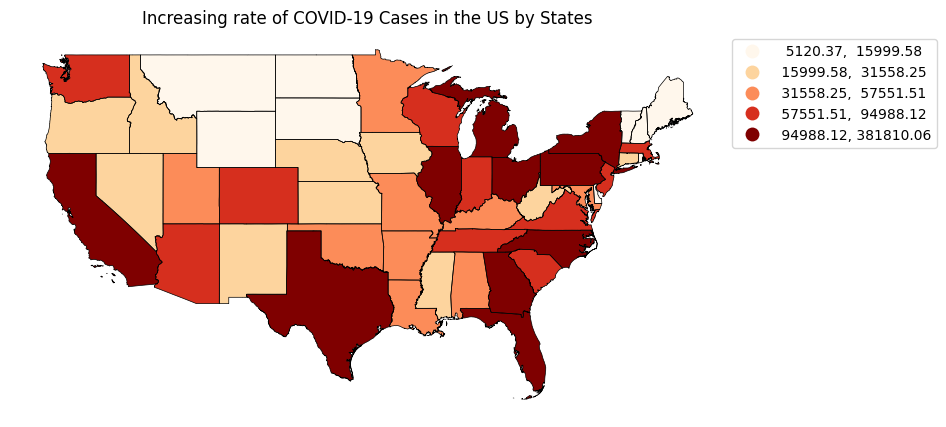

In [ ]:
gdf_increase_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',legend=True,scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1), 'loc': 'upper left'})
gdf_increase_rate.boundary.plot(color='k', linewidth=0.5,ax = plt.gca())

plt.title('Increasing rate of COVID-19 Cases in the US by States')
plt.axis('off')
plt.show()

Seems like there is a positive correlation (states with higher population density will also has higher increase rate) between the increasing rate of Covid-19 and the population density. We can verify this correlation using a scatterplot.

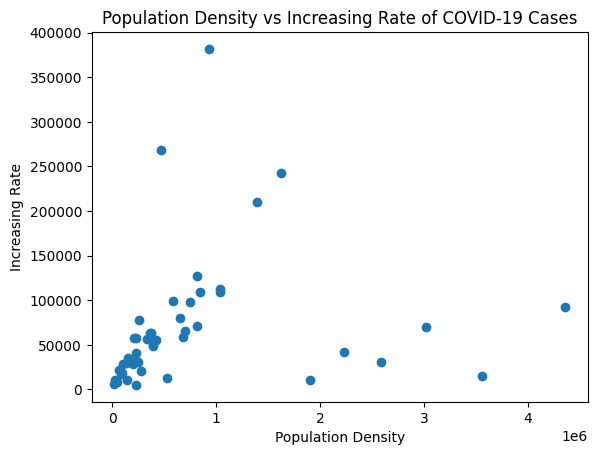

In [ ]:
tem  = gdf_increase_rate.merge(gpf_pop_density, on='Province_State')
#drop the outiler
tem = tem[tem['Province_State'] != 'District of Columbia']
plt.scatter(tem['Pop Density'], tem['slope'])
plt.title('Population Density vs Increasing Rate of COVID-19 Cases')
plt.xlabel('Population Density')
plt.ylabel('Increasing Rate')
plt.show()

In [ ]:
tem[['Pop Density', 'slope']].corr()

,Pop Density,slope
Pop Density,1.000000,0.184633
slope,0.184633,1.000000


Analyzing COVID-19 data across states presents numerous challenges due to variations in data collection methods, test accessibility, and political influences on reporting. These disparities make direct comparisons difficult. However, despite these challenges, major trends such as geospatial hotspots (in Choropleth) and temporal waves (Using Time Series Plot ) consistently emerge in the analysis.

### Geo-Json (Optional)

GeoJSON is an open standard format specifically designed for representing simple geographical features, along with their non-spatial attributes, based on JavaScript Object Notation (JSON). It can accommodate diverse types of geographical features such as points, line strings, polygons, and multi-part collections of these types. One of its primary advantages is its readability - both by humans and machines, as it stores all the relevant data in a single text file. (You cannot open the raw `.shp` file without special software) However, this advantage could turn into a disadvantage when dealing with intricate geometries, leading to significantly large file sizes.

Here is an example of GeoJson Structure:

In [ ]:
{
  "type": "Feature",
  "geometry": { # the geometry of the sample
    "type": "Point", # the type of the geometry
    "coordinates": [40.00000, 79.00000] # the coordinates of the geometry
  },
  "properties": { # additional features of the sample
    "name": "Spadina-Bloor",
    "properties": "Location"
  }
}

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [40.0, 79.0]},
 'properties': {'name': 'Spadina-Bloor', 'properties': 'Location'}}

Geopandas also supports converting GeoJSON files to `GeoDataFrame` using the `read_file()` function.

For further information about the various types of files supported by Geopandas, you can refer to the documentation available here: [Geopandas File I/O User Guide](https://geopandas.org/en/stable/docs/user_guide/io.html).

### Plotly Time Slider Choropleth (Optional)

Plotly Package offers a powerful visualization tool for spatial data analysis. One of its key benefits is the ability to incorporate a slider, allowing for dynamic exploration of data over time within a single plot. By integrating a slider, users can seamlessly transition between different time periods, eliminating the need to compare multiple plots side by side. This not only enhances the clarity and efficiency of data presentation but also enables users to gain deeper insights into temporal trends and patterns. Overall, Plotly Choropleth with a slider feature offers a versatile and intuitive solution for visualizing temporal variations in spatial data.

In [ ]:
import json
import plotly.express as px

def plotly_choropleth(gdf_import) -> None:
    gdf = gdf_import.copy()
    # ploty required a different format in input data. Luckly, we can convert the GeoDataFrame into the required format
    gdf.index = gdf['Province_State']
    gdf.drop(columns=['Province_State','Population'], inplace=True)
    # convert the geometry shapes into geojson
    state_json = json.loads(gdf['geometry'].to_json())

    # covert the features into three column: date, location, and cases
    gdf.drop(columns='geometry', inplace=True)
    gdf = gdf.stack().reset_index()
    gdf.columns = ['Province_State', 'Date', 'Cases']

    fig = px.choropleth(data_frame=gdf,geojson=state_json,
                        locations=gdf.Province_State, color='Cases',
                        animation_frame='Date',
                        width=800, height=600)
    fig.update_geos(fitbounds="locations", visible=True)
    fig.update_layout(
    margin={"r":0,"t":30,"l":10,"b":10},
    coloraxis_colorbar={'title':'Case'})
    fig.write_html("choropleth_with_slider.html")

plotly_choropleth(gdf_covid_confirmed)

The Plotly package will save the choropleth with slider into a html file. You can download from colab and open it in your browser.